---
# EDA

In [103]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [104]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. True, False 반전
def func_not(x):
    return not x

In [105]:
df_부실징후 = pd.read_csv("./datasets/부실징후_전처리끝.csv", index_col=0)
df_부실징후["거래소코드"] = df_부실징후["거래소코드"].map(padding)
print(df_부실징후.shape[0])
df_부실징후

781


,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
0,케이알모터스(주),000040,2013.0,1,-4.29,9379.15,603.89,7.59,-6.64,-2.77,...,57315.0,-8.591876e+10,8.405309,-6.576044e+08,0.001550,1,154.0,0.000010,666080.0,0.001283
1,성창기업지주(주),000180,2013.0,1,-1.39,28423.83,1111.80,14.62,-2.82,-0.52,...,253423.0,-4.619692e+10,8.684003,2.632381e+09,0.106379,0,28438.0,0.001337,-43268.0,0.000147
2,디엘(주),000210,2014.0,0,-3.33,494645.17,31419.37,2.11,-4.74,-2.06,...,2648892.0,8.205913e+10,-2.139125,1.844954e+09,-1.336562,1,-2124518.0,-0.010160,-122922.0,0.000605
3,일동홀딩스(주),000230,2017.0,1,0.61,20134.11,1550.73,44.23,0.06,0.78,...,174057.0,-4.613540e+11,7.191381,6.045934e+08,-0.263390,0,-854.0,0.000013,-148806.0,-0.001702
4,(주)대유플러스,000300,2012.0,0,-4.88,28096.06,3110.15,0.91,-4.78,-2.90,...,101198.0,-2.580369e+10,5.164151,7.068060e+08,-2.521432,0,-1414659.0,-0.002001,-1238620.0,-0.002065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,(주)에이트원,230980,2018.0,1,-0.14,12878.02,4094.78,9.05,-1.56,-1.08,...,22545.0,-1.272294e+11,6.732754,-5.899405e+09,-0.068759,1,8810.0,0.000218,-192641.0,-0.005370
777,(주)얼라인드제네틱스,238120,2017.0,1,-29.21,2091.01,-294.03,58.33,-31.13,-4.97,...,22022.0,-3.992706e+11,7.191381,3.283293e+09,0.446974,0,30809.0,0.001985,-8713.0,-0.000922
778,피씨엘(주),241820,2018.0,1,-29.21,-2639.11,-28.40,34.40,-249.62,-45.10,...,12676.0,-4.106535e+11,2.340424,2.617107e+10,0.049385,3,0.0,0.000000,-51504.0,-0.001132
779,(주)아스타,246720,2018.0,1,-22.95,-929.19,-333.43,58.33,-202.15,-14.10,...,33248.0,-1.545284e+10,2.340424,1.086485e+10,0.227212,0,0.0,0.000000,-139221.0,-0.001538


전체 데이터 수 : 781
한계기업 데이터 수 : 562
회생기업 데이터 수 : 219


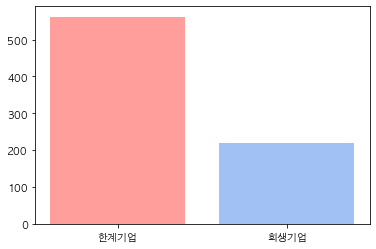

In [106]:
import matplotlib.pyplot as plt
import numpy as np

print("전체 데이터 수 :", df_부실징후.shape[0])
print("한계기업 데이터 수 :", df_부실징후[df_부실징후["한계기업여부"]==1].shape[0])
print("회생기업 데이터 수 :", df_부실징후[df_부실징후["한계기업여부"]==0].shape[0])

# --------------
x = np.arange(2)
years = ['한계기업', '회생기업']
values = [df_부실징후[df_부실징후["한계기업여부"]==1].shape[0], df_부실징후[df_부실징후["한계기업여부"]==0].shape[0]]

plt.bar(x, values, color=["#FF9E9B", "#A1C0F4"])
plt.xticks(x, years)

plt.show()

2012년 :  276
2013년 :  117
2014년 :  89
2015년 :  58
2016년 :  67
2017년 :  83
2018년 :  91


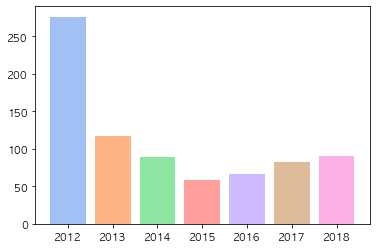

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# 각 년도 기업수
list_year = [2012, 2013,2014,2015,2016,2017,2018]
for i in list_year:
        print(str(i)+"년 : ", len(df_부실징후[df_부실징후["회계년도"]==i]["거래소코드"].unique()))          

# --------------
x = np.arange(7)
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']
values = [df_부실징후[df_부실징후["회계년도"]==2012].shape[0], df_부실징후[df_부실징후["회계년도"]==2013].shape[0], df_부실징후[df_부실징후["회계년도"]==2014].shape[0]
        , df_부실징후[df_부실징후["회계년도"]==2015].shape[0], df_부실징후[df_부실징후["회계년도"]==2016].shape[0], df_부실징후[df_부실징후["회계년도"]==2017].shape[0], df_부실징후[df_부실징후["회계년도"]==2018].shape[0]]

plt.bar(x, values, color=["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF", "#DEBB9B", "#FAB0E4"])
plt.xticks(x, years)

plt.show()

---
# Data Split
- Train과 Test를 분리 후 각각 scaling
- Train set를 가지고 Feature selection 진행

In [108]:
print(len(df_부실징후))
df_부실징후.head(3)

781


,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
0,케이알모터스(주),000040,2013.0,1,-4.29,9379.15,603.89,7.59,-6.64,-2.77,...,57315.0,-8.591876e+10,8.405309,-6.576044e+08,0.001550,1,154.0,0.000010,666080.0,0.001283
1,성창기업지주(주),000180,2013.0,1,-1.39,28423.83,1111.80,14.62,-2.82,-0.52,...,253423.0,-4.619692e+10,8.684003,2.632381e+09,0.106379,0,28438.0,0.001337,-43268.0,0.000147
2,디엘(주),000210,2014.0,0,-3.33,494645.17,31419.37,2.11,-4.74,-2.06,...,2648892.0,8.205913e+10,-2.139125,1.844954e+09,-1.336562,1,-2124518.0,-0.010160,-122922.0,0.000605


In [102]:
list(df_부실징후.columns)

['회사명',
 '거래소코드',
 '회계년도',
 '한계기업여부',
 '이자보상배율(이자비용)',
 '부가가치(백만원)',
 '금융비용(백만원)',
 '매출액총이익률',
 '매출액순이익률',
 '총자본사업이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '경영자본순이익률',
 '자본금순이익률',
 '매출원가대매출액비율',
 '영업비용대영업수익비율',
 '금융손익비율',
 '금융비용부담률',
 '기업순이익률',
 '인건비대총비용비율',
 '금융비용대총비용비율',
 '이자부담률',
 '지급이자율',
 '차입금평균이자율',
 '유보율',
 '유동자산구성비율',
 '재고자산대유동자산비율',
 '유동자산대비유동자산비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '자기자본배율',
 '유동비율',
 '현금비율',
 '매출채권비율',
 '매입채무대재고자산비율',
 '순운전자본비율',
 '차입금의존도',
 '차입금비율',
 '총자본회전률',
 '자기자본회전률',
 '자본금회전률',
 '타인자본회전률',
 '매입채무회전률',
 '당좌자산회전률',
 '재고자산회전률',
 '매출채권회전률',
 '비유동자산회전률',
 '유형자산회전율',
 '순운전자본회전률',
 '사내유보대자기자본비율',
 '자기자본배당률',
 '배당성향',
 '이익잉여금(결손금)(요약)(백만원)',
 '비유동금융부채(요약)(백만원)',
 '비유동자산증가율',
 '유동금융부채(요약)(백만원)',
 '외국인_주식분포비율',
 '장기금융부채(백만원)',
 '자산대비자본비율',
 '차입',
 '총자본증가율',
 '유형자산증가율',
 '비유동자산(백만원)',
 '자기자본증가율',
 '매출액증가율',
 '직원증감률',
 '자산대비_장기금융부채비율',
 '투자축소_여부',
 '직원증감률_여부',
 '종업원수증가율',
 '투자활동현금흐름증감률',
 '매출원가축소_여부',
 '자산매각_여부',
 '자본증가율_여부',
 '차입_여부',
 '사내유보금보유_여부',
 '운용적범주전략(OPS)변수',
 'LEV지수',
 

In [116]:
target = '한계기업여부'
list_non_col = ['투자축소_여부', '직원증감률_여부', '종업원수증가율','매출원가축소_여부', '자산매각_여부', '자본증가율_여부', '차입_여부', '사내유보금보유_여부', '운용적범주전략(OPS)변수','기업생명주기',]

# tain : 2012~2016
train_set = df_부실징후[((df_부실징후["회계년도"]==2017)|(df_부실징후["회계년도"]==2018)).map(func_not)]
train_set.reset_index(drop=True, inplace=True)
train_set_index = train_set[["거래소코드","회계년도"]] # 나중에 투자할 회생기업 뽑을 때 사용
y_train = train_set[target]
X_train_non_scale = train_set[list_non_col]
X_train = train_set.drop(["회사명", '거래소코드', "회계년도", target], axis=1)
X_train = X_train.drop(list_non_col, axis=1)


# test : 2017, 2018
test_set = df_부실징후[((df_부실징후["회계년도"]==2017)|(df_부실징후["회계년도"]==2018))]
test_set.reset_index(drop=True, inplace=True)
test_set_index = test_set[["거래소코드","회계년도"]] # 나중에 투자할 회생기업 뽑을 때 사용
y_test = test_set[target]
X_test_non_scale = test_set[list_non_col]
X_test = test_set.drop(["회사명", '거래소코드', "회계년도",target], axis=1)
X_test = X_test.drop(list_non_col, axis=1)

In [118]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_train)
data_scaled_stan = scaler_stan.transform(X_train)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_train_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train.columns)
x_train_stan = pd.concat([x_train_stan, X_train_non_scale], axis=1)
x_train_stan

,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,총자본순이익률,자기자본순이익률,경영자본순이익률,자본금순이익률,...,투자축소_여부,직원증감률_여부,종업원수증가율,매출원가축소_여부,자산매각_여부,자본증가율_여부,차입_여부,사내유보금보유_여부,운용적범주전략(OPS)변수,기업생명주기
0,0.239475,-0.237312,-0.363394,-0.339336,0.421883,0.332877,0.278988,0.431860,0.453838,0.662705,...,0,0,-4.819277,0.0,0,0,0,0,0,1
1,0.550029,-0.036135,-0.337115,0.088769,0.499815,0.551640,0.481249,0.664605,0.707267,0.636958,...,1,0,-8.974359,1.0,0,0,0,0,1,0
2,0.342279,4.888761,1.230999,-0.673051,0.460645,0.401909,0.348766,0.435374,0.478286,-0.681660,...,1,0,-5.089505,0.0,0,0,1,0,1,1
3,0.176293,-0.039597,-0.233721,-0.746127,0.459829,0.320238,0.402042,0.296970,0.413885,0.464017,...,0,0,15.424165,0.0,0,1,0,0,0,0
4,0.364767,-1.006339,1.972799,-1.571888,-0.381508,-0.199930,-0.233971,-1.463621,-0.704185,-2.567871,...,0,0,-13.318777,0.0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,-2.429155,-0.360176,-0.406313,-0.801543,-0.119560,-1.027338,-0.844525,-0.213123,-1.085820,-0.960450,...,0,0,34.146341,0.0,1,0,0,0,0,4
603,-2.429155,-0.370890,-0.390894,0.790910,-4.535150,-4.329190,-1.720516,-2.264037,-2.080455,-0.928505,...,1,0,21.276596,0.0,0,1,0,0,1,0
604,-1.324008,-0.390163,-0.384113,2.750570,-4.535150,-1.771130,-0.537598,-0.305302,-0.646940,-0.073198,...,0,0,27.419355,0.0,1,0,1,0,0,0
605,0.139883,-0.594071,-0.386730,-1.944577,-4.535150,-0.699681,-4.685591,0.709748,-3.487733,-3.526711,...,0,0,19.444444,0.0,1,0,0,0,0,0


In [119]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_test)
data_scaled_stan = scaler_stan.transform(X_test)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_test_stan = pd.DataFrame(data = data_scaled_stan, columns=X_test.columns)
x_test_stan = pd.concat([x_test_stan, X_test_non_scale], axis=1)
x_test_stan

,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,총자본순이익률,자기자본순이익률,경영자본순이익률,자본금순이익률,...,투자축소_여부,직원증감률_여부,종업원수증가율,매출원가축소_여부,자산매각_여부,자본증가율_여부,차입_여부,사내유보금보유_여부,운용적범주전략(OPS)변수,기업생명주기
0,0.905577,-0.173789,-0.195188,1.767937,0.526339,0.693626,0.701375,0.681572,0.795620,0.910634,...,1,0,1.388889,0.0,0,1,0,0,1,0
1,-1.617986,-0.074835,-0.500284,-0.311486,0.519420,0.439925,0.681263,0.656212,0.761824,0.840937,...,1,0,3.209877,0.0,0,1,0,0,1,4
2,0.868341,-0.312552,-0.077032,0.172671,0.486919,0.639867,0.660457,0.637714,0.604734,0.808465,...,0,0,0.000000,1.0,0,0,1,0,1,1
3,0.933503,-0.018960,-0.220650,1.265394,0.618693,0.748327,1.041205,0.917870,1.087270,1.012532,...,1,1,-30.576441,0.0,0,1,1,0,1,1
4,0.831951,-0.643130,-0.215774,-0.154595,0.060383,0.640811,-0.549061,-0.202159,-0.717705,-2.454353,...,1,0,0.000000,1.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.842107,-0.260385,0.063378,-0.388093,0.500274,0.518204,0.620232,0.505841,0.709252,0.352509,...,1,0,-10.309278,0.0,1,1,0,0,1,1
170,-1.617986,-0.389121,-0.382682,2.632065,0.024503,0.151328,0.215903,0.444081,0.350635,0.194500,...,1,0,-8.771930,0.0,1,0,0,0,1,0
171,-1.617986,-0.445572,-0.355684,1.165498,-3.490920,-3.633435,-2.321033,-0.700115,-1.997585,-0.017310,...,1,0,40.000000,0.0,1,0,0,0,1,3
172,-1.088224,-0.425165,-0.386686,2.632065,-2.727145,-0.709745,-0.088557,0.317876,-0.205127,0.524715,...,0,0,-4.166667,0.0,1,1,0,0,0,0


---
## EDA

### 1. Data type

In [ ]:
df_부실징후.info()
# df_부실징후.isna().sum().to_dict()

#### 2. 기술통계량

In [ ]:
x_scaled_stan.describe().T

#### 3. Boxplot

In [ ]:
df_부실징후_outlier = x_scaled_stan
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

ncols = 5
nrows = 17

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 100))

for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
    df_부실징후_outlier[[col]].boxplot(ax=ax)
    
plt.show()

#### 4. Distplot

In [ ]:
# distplot
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
col_n = 5
row_n = 17

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, col in enumerate(x_scaled_stan.columns[:]):
    sns.distplot(x_scaled_stan[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)] , color='red')

#### 5. QQplot

In [ ]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"
# 85
ncols = 8
nrows = 11

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
fig.set_size_inches((50, 80))

for ax, i in zip(axs.ravel(), x_scaled_stan):
        stats.probplot(x_scaled_stan[i], dist=stats.norm, plot=ax)
        ax.set_title(str(i))

plt.show()

#### 6. 샤피로 테스트

In [ ]:
from scipy import stats
from scipy.stats import shapiro

def Shapiro(x_scaled_stan):
    Shapi = []
    Shapi.append([col for col in x_scaled_stan])
    for i in Shapi:
        for j in i:
            shapiro_test,p_val = shapiro(x_scaled_stan[j])
            print(j,"Test-statistics : {}, p-value : {}". format(shapiro_test,p_val))

Shapiro(x_scaled_stan.iloc[:,:])

#### 7. 앤더슨

In [ ]:
# 엔달슨 - 달링
from scipy import stats
from scipy.stats import anderson

def Anderson(x_scaled_stan):
    ander = []
    ander.append([col for col in x_scaled_stan])
    for i in ander:
        for j in i:
            anderson_test = anderson(x_scaled_stan[j], dist='norm')
            print(j,anderson_test)

Anderson(x_scaled_stan)

#### 8. 산점도(pair plot)

In [ ]:
# cmap = sns.light_palette("darkgray", as_cmap = True)
# sns.set(font="AppleGothic",rc = {'figure.figsize':(16,8)})  
# # sns.heatmap(x.corr(), annot = True, cmap = cmap)
# # plt.show()

# # 4) 변수끼리 산점도를 시각화
# sns.pairplot(x_scaled_robust)
# plt.show()

---
# Feature Selection

## 0. Heatmap

<AxesSubplot: title={'center': 'Correlation of Features'}>

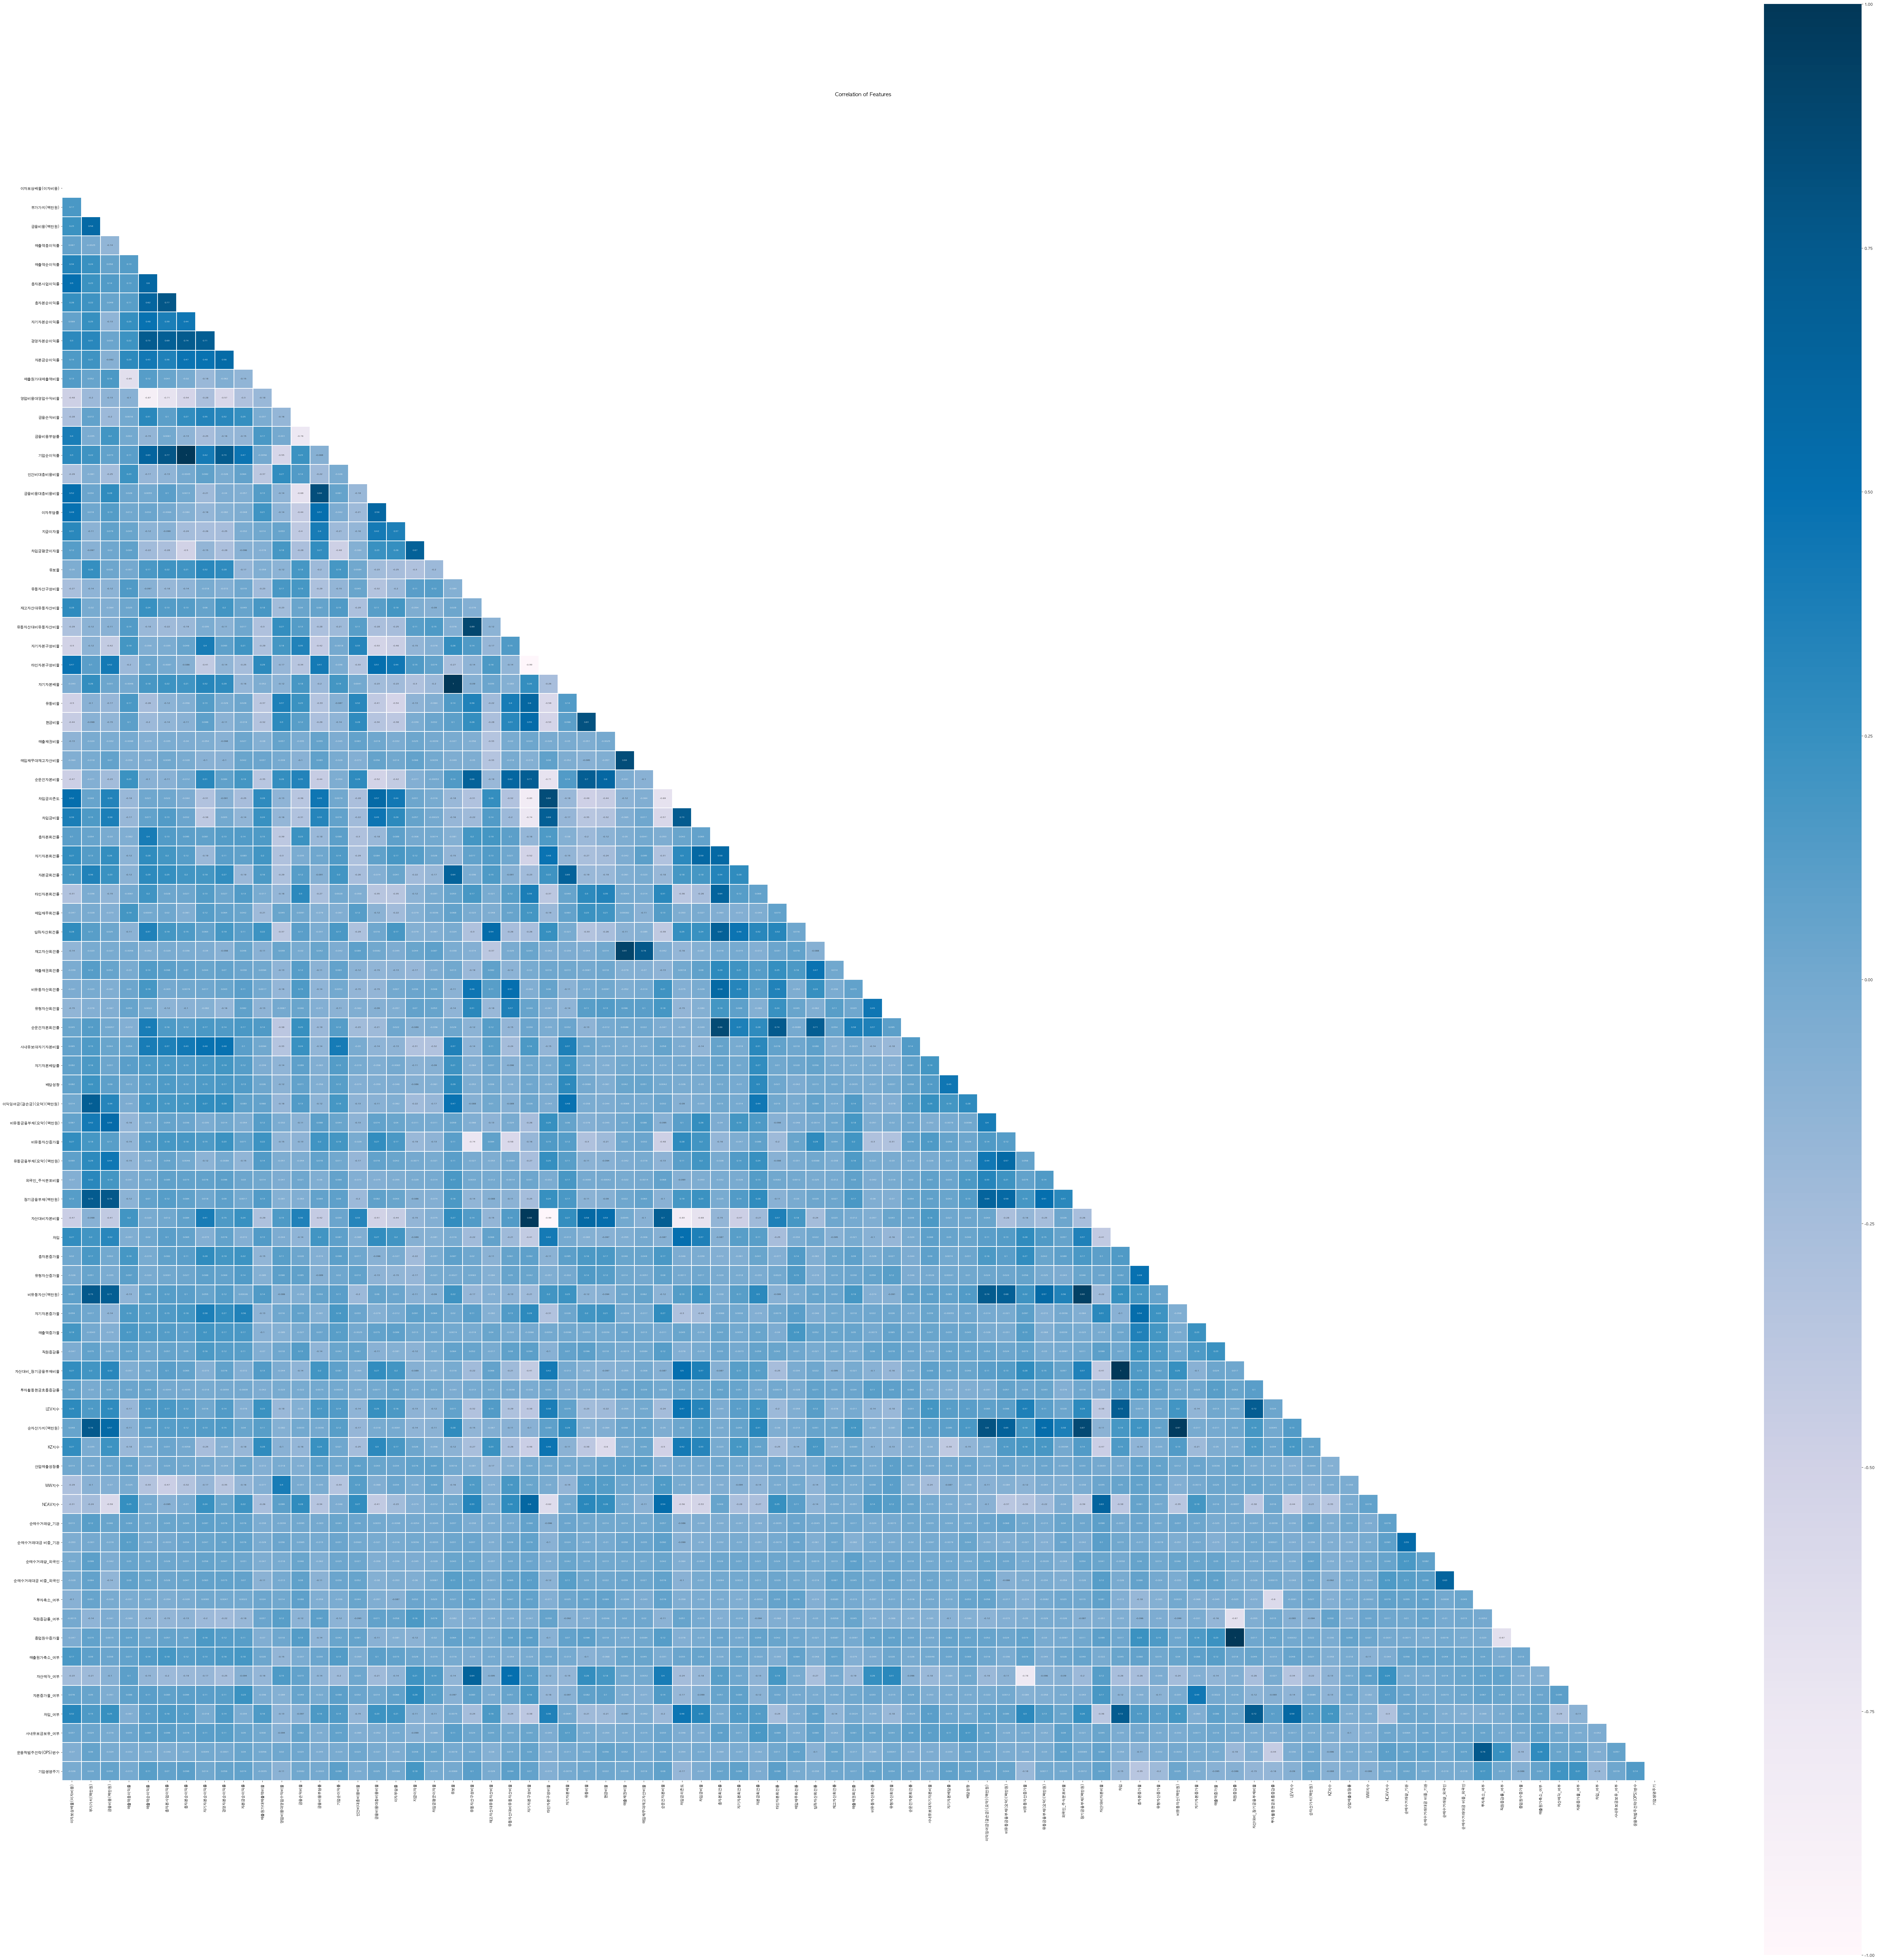

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# plt.rcParams['font.family'] = 'Malgun Gothic'
df_corr = x_train_stan.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


colormap = plt.cm.PuBu
plt.figure(figsize=(100, 100))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(x_train_stan.astype(float).corr(), linewidths = 0.1, mask=mask ,vmax = 1.0, 
            vmin= -1.0 , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 6})

#### 정규성검정 만족하는 컬럼 확인

In [121]:
# 정규성 검정을 하나의 함수로
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [122]:
# 1) shapiro
## normal
## 귀무가설을 기각하지 못했다 -> 정규분포를 따른다
## notnormal
## 귀무가설을 기각 대립가설 채택 -> data 분포가 정규분포를 따르지 않는다.
normal_s,notnormal_s = normal_test('shapiro',x_train_stan)
normal_s

,normal


In [123]:
# 2) anderson test
normal_a,notnormal_a = normal_test('anderson',x_train_stan)
normal_a

,normal


In [124]:
# 3) ks test
normal_ks,notnormal_ks = normal_test('kstest',x_train_stan)
normal_ks

,normal
0,유동자산구성비율
1,타인자본구성비율
2,순운전자본비율
3,차입금의존도
4,자산대비자본비율


In [125]:
# 4) jarque_bera test
normal_jb,notnormal_jb = normal_test('jarque_bera',x_train_stan)
normal_jb

,normal
0,차입금의존도


In [126]:
# 5) normaltest
normal_n,notnormal_n = normal_test('normaltest',x_train_stan)
normal_n

,normal
0,차입금의존도


## 1. 등분산 검정

In [127]:
x_등분산 = pd.concat([x_train_stan, y_train], axis=1)
x_등분산

,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,총자본순이익률,자기자본순이익률,경영자본순이익률,자본금순이익률,...,직원증감률_여부,종업원수증가율,매출원가축소_여부,자산매각_여부,자본증가율_여부,차입_여부,사내유보금보유_여부,운용적범주전략(OPS)변수,기업생명주기,한계기업여부
0,0.239475,-0.237312,-0.363394,-0.339336,0.421883,0.332877,0.278988,0.431860,0.453838,0.662705,...,0,-4.819277,0.0,0,0,0,0,0,1,1
1,0.550029,-0.036135,-0.337115,0.088769,0.499815,0.551640,0.481249,0.664605,0.707267,0.636958,...,0,-8.974359,1.0,0,0,0,0,1,0,1
2,0.342279,4.888761,1.230999,-0.673051,0.460645,0.401909,0.348766,0.435374,0.478286,-0.681660,...,0,-5.089505,0.0,0,0,1,0,1,1,0
3,0.176293,-0.039597,-0.233721,-0.746127,0.459829,0.320238,0.402042,0.296970,0.413885,0.464017,...,0,15.424165,0.0,0,1,0,0,0,0,0
4,0.364767,-1.006339,1.972799,-1.571888,-0.381508,-0.199930,-0.233971,-1.463621,-0.704185,-2.567871,...,0,-13.318777,0.0,1,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,-2.429155,-0.360176,-0.406313,-0.801543,-0.119560,-1.027338,-0.844525,-0.213123,-1.085820,-0.960450,...,0,34.146341,0.0,1,0,0,0,0,4,1
603,-2.429155,-0.370890,-0.390894,0.790910,-4.535150,-4.329190,-1.720516,-2.264037,-2.080455,-0.928505,...,0,21.276596,0.0,0,1,0,0,1,0,1
604,-1.324008,-0.390163,-0.384113,2.750570,-4.535150,-1.771130,-0.537598,-0.305302,-0.646940,-0.073198,...,0,27.419355,0.0,1,0,1,0,0,0,1
605,0.139883,-0.594071,-0.386730,-1.944577,-4.535150,-0.699681,-4.685591,0.709748,-3.487733,-3.526711,...,0,19.444444,0.0,1,0,0,0,0,0,1


In [128]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산
from scipy.stats import bartlett
def bartlett_test(col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(x_등분산[x_등분산['한계기업여부']==1][i], x_등분산[x_등분산['한계기업여부']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a

In [129]:
# 이분산성 변수
x_hetero = bartlett_test(x_train_stan, H = 1)
x_hetero

,변수,p_value
6,총자본순이익률,8.939047e-44
11,영업비용대영업수익비율,2.220021e-43
14,기업순이익률,3.508512e-42
72,순매수거래량_외국인,1.129902e-41
17,이자부담률,1.820256e-23
5,총자본사업이익률,1.960542e-21
4,매출액순이익률,1.137889e-20
19,차입금평균이자율,1.214090e-18
13,금융비용부담률,1.514067e-18
7,자기자본순이익률,5.552085e-16


In [130]:
# 등분산성 변수
x_homo = bartlett_test(x_train_stan.columns, H = 0)
x_homo

,변수,p_value
1,부가가치(백만원),0.053114
56,총자본증가율,0.054953
29,매출채권비율,0.086951
3,매출액총이익률,0.087388
59,자기자본증가율,0.104950
34,총자본회전률,0.106848
71,순매수거래대금 비중_기관,0.113361
79,자본증가율_여부,0.170668
58,비유동자산(백만원),0.171683
51,유동금융부채(요약)(백만원),0.238333


In [131]:
x_test_stan.head()

,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,총자본순이익률,자기자본순이익률,경영자본순이익률,자본금순이익률,...,투자축소_여부,직원증감률_여부,종업원수증가율,매출원가축소_여부,자산매각_여부,자본증가율_여부,차입_여부,사내유보금보유_여부,운용적범주전략(OPS)변수,기업생명주기
0,0.905577,-0.173789,-0.195188,1.767937,0.526339,0.693626,0.701375,0.681572,0.795620,0.910634,...,1,0,1.388889,0.0,0,1,0,0,1,0
1,-1.617986,-0.074835,-0.500284,-0.311486,0.519420,0.439925,0.681263,0.656212,0.761824,0.840937,...,1,0,3.209877,0.0,0,1,0,0,1,4
2,0.868341,-0.312552,-0.077032,0.172671,0.486919,0.639867,0.660457,0.637714,0.604734,0.808465,...,0,0,0.000000,1.0,0,0,1,0,1,1
3,0.933503,-0.018960,-0.220650,1.265394,0.618693,0.748327,1.041205,0.917870,1.087270,1.012532,...,1,1,-30.576441,0.0,0,1,1,0,1,1
4,0.831951,-0.643130,-0.215774,-0.154595,0.060383,0.640811,-0.549061,-0.202159,-0.717705,-2.454353,...,1,0,0.000000,1.0,0,0,0,0,1,0


## durbin-watsons


In [132]:
x_train_stan.head

<bound method NDFrame.head of      이자보상배율(이자비용)  부가가치(백만원)  금융비용(백만원)   매출액총이익률   매출액순이익률   총자본사업이익률  \
0        0.239475  -0.237312  -0.363394 -0.339336  0.421883   0.332877   
1        0.550029  -0.036135  -0.337115  0.088769  0.499815   0.551640   
2        0.342279   4.888761   1.230999 -0.673051  0.460645   0.401909   
3        0.176293  -0.039597  -0.233721 -0.746127  0.459829   0.320238   
4        0.364767  -1.006339   1.972799 -1.571888 -0.381508  -0.199930   
..            ...        ...        ...       ...       ...        ...   
602     -2.429155  -0.360176  -0.406313 -0.801543 -0.119560  -1.027338   
603     -2.429155  -0.370890  -0.390894  0.790910 -4.535150  -4.329190   
604     -1.324008  -0.390163  -0.384113  2.750570 -4.535150  -1.771130   
605      0.139883  -0.594071  -0.386730 -1.944577 -4.535150  -0.699681   
606     -2.186066  -0.350052  -0.391095  2.750570 -1.801009 -11.231383   

      총자본순이익률  자기자본순이익률  경영자본순이익률   자본금순이익률  ...  투자축소_여부  직원증감률_여부  \
0    0.278

## 2. t-test

In [133]:
# 2) t_test
import scipy.stats as stats
def t_test(col, col_h0, col_h1, p_value = 0.05):
    list= []
    for i in col:
        if (col_h0['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['한계기업여부']==1][i], x_등분산[x_등분산['한계기업여부']==0][i], equal_var=True)
            list.append([i, p_val])
        elif (col_h1['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_등분산[x_등분산['한계기업여부']==1][i], x_등분산[x_등분산['한계기업여부']==0][i], equal_var=False)
            list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
    return a

In [134]:
# 2) t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest = t_test(x_train_stan.columns, x_homo, x_hetero, p_value=0.05)
print("유의한 피쳐 수 :", len(x_ttest))
x_ttest.sort_values(by="변수", ascending=True)

유의한 피쳐 수 : 25


,변수,p_value
68,WW지수,2.873925e-04
8,경영자본순이익률,1.620124e-09
16,금융비용대총비용비율,8.557245e-03
13,금융비용부담률,3.141947e-03
14,기업순이익률,5.887691e-07
4,매출액순이익률,9.607308e-09
77,매출원가축소_여부,1.174554e-02
1,부가가치(백만원),4.689994e-02
45,사내유보대자기자본비율,1.303747e-08
44,순운전자본회전률,7.680234e-03


In [135]:
ttest_col = list(x_ttest["변수"])
# ttest_col

In [136]:
# # ttest 다른 방법 : Logit Ttest
# import statsmodels.api as sm

# # 상수항 추가
# x_ = sm.add_constant(x_scaled_stan, has_constant = "add")

# # 회귀모델 적합
# multi_model1 = sm.Logit(x_등분산[['회생여부']], x_)
# fitted_multi_model1 = multi_model1.fit()

# # 결과 출력
# fitted_multi_model1.summary()

## 3. VIF

In [137]:
col_유의 = list(x_ttest["변수"])
X_train_유의 = x_train_stan[col_유의]

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X_train_유의.values, i) for i in range(X_train_유의.shape[1])]
vif["features"] = X_train_유의.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,1487.012572,기업순이익률
1,1475.041424,총자본순이익률
2,203.950202,자기자본배율
3,197.439760,유보율
4,11.218960,매출액순이익률
5,10.327767,영업비용대영업수익비율
6,7.543100,금융비용대총비용비율
7,6.454596,경영자본순이익률
8,6.267619,총자본회전률
9,6.081260,총자본사업이익률


## 4. Wrapper방법

### 4-2. Stepwise

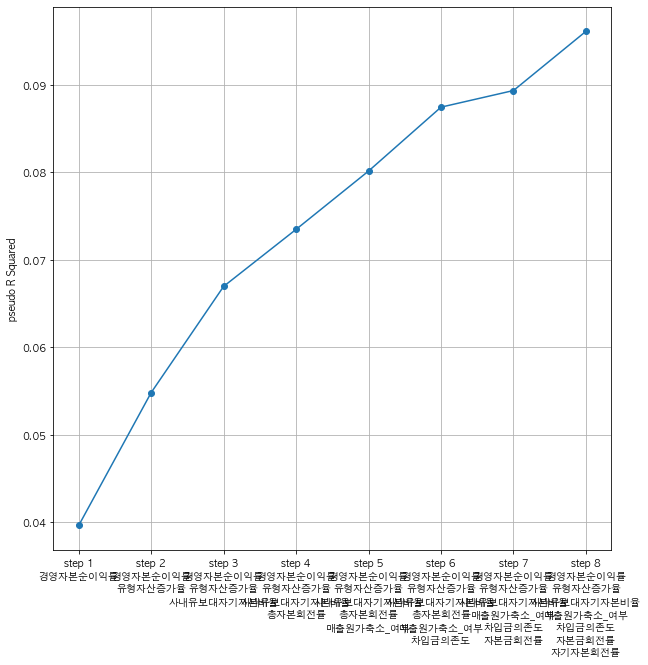

In [139]:
def stepwise_feature_selection(feature, target, variables):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:]
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            presudo_r_squared = sm.Logit(y,sm.add_constant(feature[selected_variables])).fit(disp=0).prsquared
            r_squared.append(presudo_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)])
    plt.plot(steps,r_squared, marker='o')
    plt.ylabel('pseudo R Squared')
    plt.grid(True)
    plt.show()

    return selected_variables
    
selected_variables = stepwise_feature_selection(x_train_stan, y_train, x_train_stan.columns.tolist())

In [140]:
print(len(selected_variables))
selected_variables

7


['경영자본순이익률',
 '유형자산증가율',
 '사내유보대자기자본비율',
 '매출원가축소_여부',
 '차입금의존도',
 '자본금회전률',
 '자기자본회전률']

## 5. Embbeded Methods

### 5-1. Lasso

In [141]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(x_train_stan, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.7249


In [179]:
lasso_best = LogisticRegression(C=0.06,penalty='l1',solver='liblinear').fit(x_train_stan, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = x_train_stan.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
7,자기자본순이익률,-0.009220
8,경영자본순이익률,-0.110058
11,영업비용대영업수익비율,0.154674
16,금융비용대총비용비율,0.006141
19,차입금평균이자율,0.007981
30,매입채무대재고자산비율,-0.009223
32,차입금의존도,0.086299
36,자본금회전률,-0.112025
45,사내유보대자기자본비율,-0.150935
48,이익잉여금(결손금)(요약)(백만원),-0.003434


In [180]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso_features

Lasso에서 선택된 피처 수 13 개


['자기자본순이익률',
 '경영자본순이익률',
 '영업비용대영업수익비율',
 '금융비용대총비용비율',
 '차입금평균이자율',
 '매입채무대재고자산비율',
 '차입금의존도',
 '자본금회전률',
 '사내유보대자기자본비율',
 '이익잉여금(결손금)(요약)(백만원)',
 '유형자산증가율',
 'WW지수',
 '종업원수증가율']

## 6. Filter Method

### selectKBest
: 각 피처와 타겟 사이에 통계적 관계(상관계수)를 계산 후, 유의미하다고 판단되는 피처를 선택하는 방식, 피처 선택 후 따로 모델 적용이 필요가 없다.

In [181]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

f_classif_selector = SelectKBest(f_classif, k=13)
f_classif_selector.fit(x_train_stan, y_train)

f_classif_scores = pd.DataFrame()
f_classif_scores['Feature'] = x_train_stan.columns
f_classif_scores['Support'] = f_classif_selector.get_support()
f_classif_scores[f_classif_scores["Support"]==True]

,Feature,Support
4,매출액순이익률,True
5,총자본사업이익률,True
6,총자본순이익률,True
7,자기자본순이익률,True
8,경영자본순이익률,True
11,영업비용대영업수익비율,True
14,기업순이익률,True
20,유보율,True
26,자기자본배율,True
36,자본금회전률,True


In [182]:
list_kbest = list(f_classif_scores[f_classif_scores["Support"]==True]["Feature"])
print(len(list_kbest))
list_kbest

13


['매출액순이익률',
 '총자본사업이익률',
 '총자본순이익률',
 '자기자본순이익률',
 '경영자본순이익률',
 '영업비용대영업수익비율',
 '기업순이익률',
 '유보율',
 '자기자본배율',
 '자본금회전률',
 '사내유보대자기자본비율',
 '이익잉여금(결손금)(요약)(백만원)',
 'WW지수']

## 7. 중복 2번 Feature

In [183]:
# ttest_col
# selected_variables
# lasso_features
# list_kbest

list_ttest = list(ttest_col)
list_stepwise = list(selected_variables)
list_lasso = list(lasso_features)
list_kbest = list(list_kbest)
list_col_all = pd.Series(df_부실징후.drop(["회사명","거래소코드","회계년도","한계기업여부"], axis=1).columns)

In [184]:
def func_ttest(x):
    if x in list_ttest:
        return 1
    else:
        return 0

def func_stepwise(x):
    if x in list_stepwise:
        return 1
    else:
        return 0

def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

def func_kbest(x):
    if x in list_kbest:
        return 1
    else:
        return 0

In [203]:
feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['ttest'] = list_col_all.map(func_ttest)
feature_counts['stepwise'] = list_col_all.map(func_stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['kbest'] = list_col_all.map(func_kbest)

feature_counts["total"] = feature_counts["ttest"]+feature_counts["stepwise"]+feature_counts["lasso"]+feature_counts["kbest"]
feature_final = feature_counts[feature_counts["total"]>=3]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final


선택된 피쳐수 : 9


,Feature,ttest,stepwise,lasso,kbest,total
7,자기자본순이익률,1,0,1,1,3
8,경영자본순이익률,1,1,1,1,4
11,영업비용대영업수익비율,1,0,1,1,3
32,차입금의존도,1,1,1,0,3
36,자본금회전률,1,1,1,1,4
45,사내유보대자기자본비율,1,1,1,1,4
48,이익잉여금(결손금)(요약)(백만원),1,0,1,1,3
57,유형자산증가율,1,1,1,0,3
77,WW지수,1,0,1,1,3


---
# Modeling

## 1. Feature Select

In [186]:
df_부실징후.head(5)

,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
0,케이알모터스(주),000040,2013.0,1,-4.29,9379.15,603.89,7.59,-6.64,-2.77,...,57315.0,-8.591876e+10,8.405309,-6.576044e+08,0.001550,1,154.0,0.000010,666080.0,0.001283
1,성창기업지주(주),000180,2013.0,1,-1.39,28423.83,1111.80,14.62,-2.82,-0.52,...,253423.0,-4.619692e+10,8.684003,2.632381e+09,0.106379,0,28438.0,0.001337,-43268.0,0.000147
2,디엘(주),000210,2014.0,0,-3.33,494645.17,31419.37,2.11,-4.74,-2.06,...,2648892.0,8.205913e+10,-2.139125,1.844954e+09,-1.336562,1,-2124518.0,-0.010160,-122922.0,0.000605
3,일동홀딩스(주),000230,2017.0,1,0.61,20134.11,1550.73,44.23,0.06,0.78,...,174057.0,-4.613540e+11,7.191381,6.045934e+08,-0.263390,0,-854.0,0.000013,-148806.0,-0.001702
4,(주)대유플러스,000300,2012.0,0,-4.88,28096.06,3110.15,0.91,-4.78,-2.90,...,101198.0,-2.580369e+10,5.164151,7.068060e+08,-2.521432,0,-1414659.0,-0.002001,-1238620.0,-0.002065


In [187]:
x_train_stan

,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,총자본순이익률,자기자본순이익률,경영자본순이익률,자본금순이익률,...,투자축소_여부,직원증감률_여부,종업원수증가율,매출원가축소_여부,자산매각_여부,자본증가율_여부,차입_여부,사내유보금보유_여부,운용적범주전략(OPS)변수,기업생명주기
0,0.239475,-0.237312,-0.363394,-0.339336,0.421883,0.332877,0.278988,0.431860,0.453838,0.662705,...,0,0,-4.819277,0.0,0,0,0,0,0,1
1,0.550029,-0.036135,-0.337115,0.088769,0.499815,0.551640,0.481249,0.664605,0.707267,0.636958,...,1,0,-8.974359,1.0,0,0,0,0,1,0
2,0.342279,4.888761,1.230999,-0.673051,0.460645,0.401909,0.348766,0.435374,0.478286,-0.681660,...,1,0,-5.089505,0.0,0,0,1,0,1,1
3,0.176293,-0.039597,-0.233721,-0.746127,0.459829,0.320238,0.402042,0.296970,0.413885,0.464017,...,0,0,15.424165,0.0,0,1,0,0,0,0
4,0.364767,-1.006339,1.972799,-1.571888,-0.381508,-0.199930,-0.233971,-1.463621,-0.704185,-2.567871,...,0,0,-13.318777,0.0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,-2.429155,-0.360176,-0.406313,-0.801543,-0.119560,-1.027338,-0.844525,-0.213123,-1.085820,-0.960450,...,0,0,34.146341,0.0,1,0,0,0,0,4
603,-2.429155,-0.370890,-0.390894,0.790910,-4.535150,-4.329190,-1.720516,-2.264037,-2.080455,-0.928505,...,1,0,21.276596,0.0,0,1,0,0,1,0
604,-1.324008,-0.390163,-0.384113,2.750570,-4.535150,-1.771130,-0.537598,-0.305302,-0.646940,-0.073198,...,0,0,27.419355,0.0,1,0,1,0,0,0
605,0.139883,-0.594071,-0.386730,-1.944577,-4.535150,-0.699681,-4.685591,0.709748,-3.487733,-3.526711,...,0,0,19.444444,0.0,1,0,0,0,0,0


In [204]:
# ttest_col # ttest 피쳐
# selected_variables # stepwise 피쳐
# lasso_features # lasso 피쳐
# list_kbest # kbest 피쳐
# list_feature_final # 2번 중복 피쳐

X_train = x_train_stan[list_feature_final]
y_train = y_train
X_test = x_test_stan[list_feature_final]
y_test = y_test

In [189]:
# print("최종 피쳐 수", len(selected_variables))
# selected_variables

## 5. Resampling(안씀)

In [190]:
# # 오버샘플링
# from imblearn.over_sampling import SMOTE
# rus = SMOTE(sampling_strategy='auto')
# X_train, y_train = rus.fit_resample(X_train, y_train)

In [191]:
# # 언더샘플링
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=156)
# X_train, y_train = rus.fit_resample(X_train, y_train)

## 6. Modeling

[단일분류]
- Logistic
- KNN
- Decision Tree
- Naive Bayes
- SVM

[Ensamble]
- Random Forest
- XGB
- LGBM
- Voting
- Stacking

[Deeplearning]
- TabNet

In [192]:
# from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier # 컬럼명 바꿔서 돌려야함(특수문자는 아스키문자로 변환 안됌)

In [193]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    BernoulliNB(),
    SVC(),
    RandomForestClassifier(),
    XGBClassifier(),
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'AUC_val':[]}


for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Test
    y_hat = clf.predict(X_train)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['auc_train'].append(results_train[1])
    
    rdict['acc_val'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC_val'].append(results[4])   

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3 

(0.73, 0.54) (0.7, 0.71, 0.95, 0.81, 0.54)
(0.79, 0.68) (0.67, 0.71, 0.9, 0.79, 0.53)
(1.0, 1.0) (0.66, 0.75, 0.74, 0.75, 0.6)
(0.61, 0.62) (0.57, 0.77, 0.55, 0.64, 0.59)
(0.74, 0.53) (0.7, 0.7, 1.0, 0.82, 0.52)
(1.0, 1.0) (0.67, 0.69, 0.95, 0.8, 0.5)
[18:48:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(1.0, 1.0) (0.69, 0.72, 0.9, 0.8, 0.56)


,model,acc_train,auc_train,acc_val,precision,recall,f1_score,AUC_val
0,LogisticRegression(),0.73,0.54,0.70,0.71,0.95,0.81,0.54
1,KNeighborsClassifier(),0.79,0.68,0.67,0.71,0.90,0.79,0.53
2,DecisionTreeClassifier(),1.00,1.00,0.66,0.75,0.74,0.75,0.60
3,BernoulliNB(),0.61,0.62,0.57,0.77,0.55,0.64,0.59
4,SVC(),0.74,0.53,0.70,0.70,1.00,0.82,0.52
5,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.00,0.67,0.69,0.95,0.80,0.50
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",1.00,1.00,0.69,0.72,0.90,0.80,0.56


### 1. Logistic

In [194]:
rdict={'model':[], 'i':[], 'j':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_c = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
list_penalty = ["l1", "l2"]


for i in list_c:
    for j in list_penalty:
        model = LogisticRegression(C=i, penalty=j, solver="liblinear")
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)

        rdict['model'].append(model)
        rdict['i'].append(i)
        rdict['j'].append(j)
        rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
        rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
        rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),3))

rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="AUC", ascending=False, inplace=True) # AUC로
rdf.reset_index(drop=True, inplace=True)
rdf[:5]

,model,i,j,ACC,f1_score,AUC
0,"LogisticRegression(C=0.01, solver='liblinear')",0.010,l2,0.73,0.83,0.580
1,"LogisticRegression(C=0.001, solver='liblinear')",0.001,l2,0.64,0.74,0.575
2,LogisticRegression(solver='liblinear'),1.000,l2,0.70,0.81,0.540
3,"LogisticRegression(C=0.1, solver='liblinear')",0.100,l2,0.70,0.82,0.534
4,"LogisticRegression(C=10.0, solver='liblinear')",10.000,l2,0.68,0.80,0.522


In [206]:
model_LR = LogisticRegression(C=0.01, penalty='l2', solver="liblinear")

### 2. KNN

In [207]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_n_neighbors = list(range(1,20))
list_weights = ["uniform", "distance"]
list_metric = ['euclidean', 'manhattan', 'minkowski']


for i in list_n_neighbors:
    for j in list_weights:
        for k in list_metric:
            model = KNeighborsClassifier(n_neighbors=i, weights=j, metric=k)
            model.fit(X_train, y_train)
            y_hat = model.predict(X_test)

            rdict['model'].append(model)
            rdict['i'].append(i)
            rdict['j'].append(j)
            rdict['k'].append(k)
            rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
            rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
            rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))
rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="f1_score", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:5]

,model,i,j,k,ACC,f1_score,AUC
0,"KNeighborsClassifier(metric='manhattan', n_nei...",19,distance,manhattan,0.72,0.83,0.56
1,"KNeighborsClassifier(metric='manhattan', n_nei...",19,uniform,manhattan,0.72,0.83,0.55
2,"KNeighborsClassifier(n_neighbors=19, weights='...",19,distance,minkowski,0.70,0.82,0.52
3,"KNeighborsClassifier(n_neighbors=17, weights='...",17,distance,minkowski,0.70,0.82,0.54
4,"KNeighborsClassifier(metric='manhattan', n_nei...",15,uniform,manhattan,0.70,0.82,0.54


In [208]:
rdf["sum"] = rdf["f1_score"] + rdf["AUC"]
rdf.sort_values(by="sum", ascending=False).head(5)

,model,i,j,k,ACC,f1_score,AUC,sum
0,"KNeighborsClassifier(metric='manhattan', n_nei...",19,distance,manhattan,0.72,0.83,0.56,1.39
18,"KNeighborsClassifier(metric='manhattan', n_nei...",10,uniform,manhattan,0.70,0.81,0.58,1.39
1,"KNeighborsClassifier(metric='manhattan', n_nei...",19,uniform,manhattan,0.72,0.83,0.55,1.38
15,"KNeighborsClassifier(metric='manhattan', n_nei...",18,uniform,manhattan,0.71,0.82,0.56,1.38
13,"KNeighborsClassifier(metric='manhattan', n_nei...",18,distance,manhattan,0.71,0.82,0.55,1.37


In [209]:
model_KNN = KNeighborsClassifier(n_neighbors=8, weights='uniform', metric='euclidean')

In [210]:
# from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier()
# list_param = {'n_neighbors' : list(range(1,20)),
#         'weights' : ["uniform", "distance"],
#         'metric' : ['euclidean', 'manhattan', 'minkowski']}

# gridsearch = GridSearchCV(model, param_grid = list_param, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=42), n_jobs=-1, scoring='f1', verbose=0)
# gridsearch.fit(X_train, y_train)

# estimator = gridsearch.best_estimator_ # bestmodel 저장
# pred = estimator.predict(X_test) # Test 예측값

# print("Best Parameters : ", gridsearch.best_params_)
# print("Best Score : ", gridsearch.best_score_)
# print("Best Test Score : ", gridsearch.score(X_test, y_test))

In [211]:
# rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'auc_val':[]}


# # Train
# y_hat = estimator.predict(X_train)
# results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))

# rdict['model'].append(estimator); 
# rdict['acc_train'].append(results_train[0])
# rdict['auc_train'].append(results_train[1])


# # Validation
# y_hat = estimator.predict(X_test)
# results = (round(accuracy_score(y_test,y_hat),2),
#             round(precision_score(y_test,y_hat),2),
#             round(recall_score(y_test,y_hat),2),
#             round(f1_score(y_test,y_hat),2),
#             round(roc_auc_score(y_test,y_hat),2))

# rdict['acc_val'].append(results[0])
# rdict['precision'].append(results[1])
# rdict['recall'].append(results[2])
# rdict['f1_score'].append(results[3])
# rdict['auc_val'].append(results[4])   

# print(results_train, results)

# rdf = pd.DataFrame(data=rdict)
# rdf 

In [212]:
# result_df = pd.DataFrame(gridsearch.cv_results_)
# result_df.sort_values(by=['rank_test_score'],inplace=True)

# #plot
# result_df[['params','mean_test_score','rank_test_score']].head(10)

### 3. DT

In [195]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9]
list_max_depth = [2, 3, 4, 5, 6, None]
list_min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]


for i in list_min_samples_leaf:
    for j in list_max_depth:
        for k in list_min_samples_split:
            model = DecisionTreeClassifier(min_samples_leaf=i, max_depth=j, min_samples_split=k)
            model.fit(X_train, y_train)
            y_hat = model.predict(X_test)

            rdict['model'].append(model)
            rdict['i'].append(i)
            rdict['j'].append(j)
            rdict['k'].append(k)
            rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
            rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
            rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))
                
rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="f1_score", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:5]

,model,i,j,k,ACC,f1_score,AUC
0,DecisionTreeClassifier(max_depth=2),1,2.0,2,0.68,0.81,0.50
1,"DecisionTreeClassifier(max_depth=3, min_sample...",4,3.0,6,0.69,0.81,0.52
2,"DecisionTreeClassifier(max_depth=3, min_sample...",4,3.0,8,0.69,0.81,0.52
3,"DecisionTreeClassifier(max_depth=3, min_sample...",4,3.0,9,0.69,0.81,0.52
4,"DecisionTreeClassifier(max_depth=3, min_sample...",4,3.0,10,0.69,0.81,0.52


In [196]:
rdf["sum"] = rdf["f1_score"] + rdf["AUC"]
rdf.sort_values(by="sum", ascending=False).head(5)

,model,i,j,k,ACC,f1_score,AUC,sum
292,"DecisionTreeClassifier(max_depth=6, min_sample...",8,6.0,7,0.67,0.79,0.55,1.34
353,"DecisionTreeClassifier(max_depth=6, min_sample...",6,6.0,9,0.67,0.78,0.56,1.34
290,"DecisionTreeClassifier(max_depth=6, min_sample...",8,6.0,5,0.67,0.79,0.55,1.34
291,"DecisionTreeClassifier(max_depth=6, min_sample...",8,6.0,6,0.67,0.79,0.55,1.34
296,"DecisionTreeClassifier(max_depth=6, min_sample...",8,6.0,10,0.67,0.79,0.55,1.34


In [215]:
model_DT = DecisionTreeClassifier(min_samples_leaf=2, max_depth=6.0, min_samples_split=7) # 최적

### 4. NB

In [216]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'l':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_alpha = [0.01, 0.1, 0.5, 1.0, 10.0]
list_fit_prior = [True, False]
list_class_prior = [None]
list_binarize = [None, 0.0, 8.5, 10.0]

for i in list_alpha:
    for j in list_fit_prior:
        for k in list_class_prior:
            for l in list_binarize:
                model = BernoulliNB(alpha=i, fit_prior=j, class_prior=k, binarize=l)
                model.fit(X_train, y_train)
                y_hat = model.predict(X_test)

                rdict['model'].append(model)
                rdict['i'].append(i)
                rdict['j'].append(j)
                rdict['k'].append(k)
                rdict['l'].append(l)
                rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
                rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
                rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="AUC", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:10]

,model,i,j,k,l,ACC,f1_score,AUC
0,BernoulliNB(fit_prior=False),1.00,False,None,0.0,0.57,0.62,0.60
1,"BernoulliNB(alpha=0.5, fit_prior=False)",0.50,False,None,0.0,0.57,0.62,0.60
2,"BernoulliNB(alpha=0.01, fit_prior=False)",0.01,False,None,0.0,0.57,0.62,0.60
3,"BernoulliNB(alpha=0.1, fit_prior=False)",0.10,False,None,0.0,0.57,0.62,0.60
4,"BernoulliNB(alpha=10.0, fit_prior=False)",10.00,False,None,0.0,0.56,0.61,0.59
5,BernoulliNB(alpha=0.01),0.01,True,None,0.0,0.62,0.71,0.58
6,BernoulliNB(),1.00,True,None,0.0,0.62,0.72,0.58
7,BernoulliNB(alpha=10.0),10.00,True,None,0.0,0.64,0.74,0.58
8,BernoulliNB(alpha=0.1),0.10,True,None,0.0,0.62,0.71,0.58
9,BernoulliNB(alpha=0.5),0.50,True,None,0.0,0.62,0.72,0.58


In [217]:
rdf["sum"] = rdf["f1_score"] + rdf["AUC"]
rdf.sort_values(by="sum", ascending=False).head(5)

,model,i,j,k,l,ACC,f1_score,AUC,sum
39,"BernoulliNB(alpha=10.0, binarize=10.0, fit_pri...",10.0,False,None,10.0,0.69,0.82,0.5,1.32
32,"BernoulliNB(alpha=0.1, binarize=8.5)",0.1,True,None,8.5,0.69,0.82,0.5,1.32
26,"BernoulliNB(alpha=0.5, binarize=8.5)",0.5,True,None,8.5,0.69,0.82,0.5,1.32
28,"BernoulliNB(alpha=0.1, binarize=10.0, fit_prio...",0.1,False,None,10.0,0.69,0.82,0.5,1.32
21,"BernoulliNB(alpha=10.0, binarize=8.5, fit_prio...",10.0,False,None,8.5,0.69,0.82,0.5,1.32


In [218]:
model_NB = BernoulliNB(alpha=10, fit_prior=True, class_prior=None, binarize=0)

### 5. SVM

In [219]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'l':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_C = [0.1, 1, 10, 100, 1000]
list_gamma = [1, 0.1, 0.01, 0.001, 0.0001]
list_kernel = ['rbf']
list_degree = [1,2,3,4,5,6]

for i in list_C:
    for j in list_gamma:
        for k in list_kernel:
            for l in list_degree:
                model = SVC(C=i, gamma=j, kernel=k, degree=l, probability=True)
                model.fit(X_train, y_train)
                y_hat = model.predict(X_test)

                rdict['model'].append(model)
                rdict['i'].append(i)
                rdict['j'].append(j)
                rdict['k'].append(k)
                rdict['l'].append(l)
                rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
                rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
                rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="AUC", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:10]

,model,i,j,k,l,ACC,f1_score,AUC
0,"SVC(C=100, degree=2, gamma=1, probability=True)",100.0,1.0,rbf,2,0.68,0.8,0.55
1,"SVC(C=100, degree=1, gamma=1, probability=True)",100.0,1.0,rbf,1,0.68,0.8,0.55
2,"SVC(C=1000, gamma=1, probability=True)",1000.0,1.0,rbf,3,0.68,0.8,0.55
3,"SVC(C=1000, degree=4, gamma=1, probability=True)",1000.0,1.0,rbf,4,0.68,0.8,0.55
4,"SVC(C=1000, degree=5, gamma=1, probability=True)",1000.0,1.0,rbf,5,0.68,0.8,0.55
5,"SVC(C=1000, degree=6, gamma=1, probability=True)",1000.0,1.0,rbf,6,0.68,0.8,0.55
6,"SVC(C=1000, degree=1, gamma=1, probability=True)",1000.0,1.0,rbf,1,0.68,0.8,0.55
7,"SVC(C=1000, degree=2, gamma=1, probability=True)",1000.0,1.0,rbf,2,0.68,0.8,0.55
8,"SVC(C=100, gamma=1, probability=True)",100.0,1.0,rbf,3,0.68,0.8,0.55
9,"SVC(C=100, degree=4, gamma=1, probability=True)",100.0,1.0,rbf,4,0.68,0.8,0.55


In [220]:
rdf["sum"] = rdf["f1_score"] + rdf["AUC"]
rdf.sort_values(by="sum", ascending=False).head(5)

,model,i,j,k,l,ACC,f1_score,AUC,sum
0,"SVC(C=100, degree=2, gamma=1, probability=True)",100.0,1.0,rbf,2,0.68,0.80,0.55,1.35
9,"SVC(C=100, degree=4, gamma=1, probability=True)",100.0,1.0,rbf,4,0.68,0.80,0.55,1.35
25,"SVC(C=1, degree=2, gamma=0.1, probability=True)",1.0,0.1,rbf,2,0.71,0.82,0.53,1.35
26,"SVC(C=1, gamma=0.1, probability=True)",1.0,0.1,rbf,3,0.71,0.82,0.53,1.35
27,"SVC(C=1, degree=4, gamma=0.1, probability=True)",1.0,0.1,rbf,4,0.71,0.82,0.53,1.35


In [221]:
model_SVC = SVC(C=0.1, gamma=0.01, kernel='rbf', degree=2, probability=True)

### 6. RF - 여기서부터 앙상블

In [208]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'l':[], 'ACC_train':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_n_estimators = [10, 50, 100]
list_max_depth = [6, 8, 10, 12]
list_min_samples_leaf = [2, 4, 8, 10, 15, 20]
list_min_samples_split = [2, 4, 8, 10, 15, 20]


for i in list_n_estimators:
    for j in list_max_depth:
        for k in list_min_samples_leaf:
            for l in list_min_samples_split:
                model = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_leaf=k, min_samples_split=l)
                model.fit(X_train, y_train)
                y_hat_train = model.predict(X_train)
                y_hat = model.predict(X_test)

                rdict['model'].append(model)
                rdict['i'].append(i)
                rdict['j'].append(j)
                rdict['k'].append(k)
                rdict['l'].append(k)
                rdict['ACC_train'].append(round(accuracy_score(y_train,y_hat_train),2))
                rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
                rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
                rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf = pd.DataFrame(data=rdict)
rdf.sort_values(by="f1_score", ascending=False, inplace=True)
rdf.reset_index(drop=True, inplace=True)
rdf[:5]

,model,i,j,k,l,ACC_train,ACC,f1_score,AUC
0,"(DecisionTreeClassifier(max_depth=10, max_feat...",100,10,8,8,0.80,0.71,0.83,0.54
1,"(DecisionTreeClassifier(max_depth=10, max_feat...",50,10,10,10,0.80,0.71,0.83,0.54
2,"(DecisionTreeClassifier(max_depth=10, max_feat...",50,10,4,4,0.83,0.71,0.83,0.54
3,"(DecisionTreeClassifier(max_depth=8, max_featu...",100,8,2,2,0.85,0.71,0.83,0.54
4,"(DecisionTreeClassifier(max_depth=6, max_featu...",10,6,10,10,0.79,0.71,0.83,0.54


In [209]:
rdf["sum"] = rdf["f1_score"] + rdf["AUC"]
rdf.sort_values(by="sum", ascending=False).head(5)

,model,i,j,k,l,ACC_train,ACC,f1_score,AUC,sum
22,"(DecisionTreeClassifier(max_depth=12, max_feat...",10,12,15,15,0.79,0.72,0.83,0.56,1.39
6,"(DecisionTreeClassifier(max_depth=10, max_feat...",10,10,15,15,0.77,0.72,0.83,0.56,1.39
9,"(DecisionTreeClassifier(max_depth=10, max_feat...",10,10,10,10,0.82,0.72,0.83,0.56,1.39
33,"(DecisionTreeClassifier(max_depth=8, max_featu...",50,8,8,8,0.80,0.72,0.83,0.55,1.38
11,"(DecisionTreeClassifier(max_depth=6, max_featu...",10,6,20,20,0.77,0.72,0.83,0.55,1.38


In [236]:
model_RF = RandomForestClassifier(n_estimators=50, max_depth=12	, min_samples_leaf=4, min_samples_split=4)

In [ ]:
# Best parameter에서 score 잘 나오는 random state 찾기

from xgboost import XGBClassifier

rdict={'model':[], 'i':[], 'ACC_train':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_ramdomstate = list(range(1,1001))


for i in list_ramdomstate:
    model = XGBClassifier(random_state=i, min_child_weight=1, gamma=2, subsample=1, colsample_bytree=1, max_depth=5, learning_rate=0.1)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat = model.predict(X_test)
    rdict['model'].append(model)
    rdict['i'].append(i)
    rdict['ACC_train'].append(round(accuracy_score(y_train,y_hat_train),2))
    rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
    rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
    rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf_XGB = pd.DataFrame(data=rdict)
rdf_XGB.sort_values(by=["f1_score","AUC"], ascending=False, inplace=True)
rdf_XGB.reset_index(drop=True, inplace=True)
rdf_XGB[:5]

### 7. XGB

In [205]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'l':[], 'm':[], 'n':[], 'ACC_train':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_min_child_weight = [1, 5, 10]
list_gamma = [0,1,2,3]
list_subsample = [0.6, 0.8, 1.0]
list_colsample_bytree = [0.6, 0.8, 1.0]
list_max_depth = [3, 4, 5]
# list_n_estimators = [100,200,500]
list_learning_rate = [0.01,0.05,0.1,0.15]


for i in list_min_child_weight:
    for j in list_gamma:
        for k in list_subsample:
            for l in list_colsample_bytree:
                for m in list_max_depth:
                    for n in list_learning_rate:
                        model = XGBClassifier(min_child_weight=i, gamma=j, subsample=k, colsample_bytree=l, max_depth=m, learning_rate=n)
                        model.fit(X_train, y_train)
                        y_hat_train = model.predict(X_train)
                        y_hat = model.predict(X_test)
                        rdict['model'].append(model)
                        rdict['i'].append(i)
                        rdict['j'].append(j)
                        rdict['k'].append(k)
                        rdict['l'].append(l)
                        rdict['m'].append(m)
                        rdict['n'].append(n)
                        rdict['ACC_train'].append(round(accuracy_score(y_train,y_hat_train),2))
                        rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
                        rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
                        rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf_XGB = pd.DataFrame(data=rdict)
rdf_XGB.sort_values(by="f1_score", ascending=False, inplace=True)
rdf_XGB.reset_index(drop=True, inplace=True)
rdf_XGB[:5]

[18:54:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

,model,i,j,k,l,m,n,ACC_train,ACC,f1_score,AUC
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,2,1.0,1.0,5,0.05,0.89,0.72,0.83,0.57
1,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,3,1.0,0.8,5,0.05,0.84,0.71,0.83,0.55
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",5,2,1.0,1.0,3,0.05,0.78,0.71,0.83,0.55
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,1,0.8,0.6,3,0.05,0.80,0.71,0.83,0.54
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",5,2,1.0,0.6,4,0.05,0.82,0.71,0.83,0.55


In [206]:
rdf_XGB["sum"] = rdf_XGB["f1_score"] + rdf_XGB["AUC"]
rdf_XGB.sort_values(by="sum", ascending=False).head(5)

,model,i,j,k,l,m,n,ACC_train,ACC,f1_score,AUC,sum
17,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,2,1.0,1.0,5,0.10,0.89,0.73,0.83,0.59,1.42
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,2,1.0,1.0,5,0.05,0.89,0.72,0.83,0.57,1.40
201,"XGBClassifier(base_score=0.5, booster='gbtree'...",10,2,0.8,0.6,4,0.15,0.85,0.71,0.82,0.58,1.40
147,"XGBClassifier(base_score=0.5, booster='gbtree'...",5,0,1.0,1.0,4,0.05,0.81,0.72,0.82,0.58,1.40
345,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,0,1.0,1.0,5,0.05,0.94,0.72,0.82,0.58,1.40


In [202]:
model_XGB = XGBClassifier(random_state=1, min_child_weight=1, gamma=2, subsample=1, colsample_bytree=1, max_depth=5, learning_rate=0.1)

In [207]:
# Best parameter에서 score 잘 나오는 random state 찾기

from xgboost import XGBClassifier

rdict={'model':[], 'i':[], 'ACC_train':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_ramdomstate = list(range(1,1001))


for i in list_ramdomstate:
    model = XGBClassifier(random_state=i, min_child_weight=1, gamma=2, subsample=1, colsample_bytree=1, max_depth=5, learning_rate=0.1)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat = model.predict(X_test)
    rdict['model'].append(model)
    rdict['i'].append(i)
    rdict['ACC_train'].append(round(accuracy_score(y_train,y_hat_train),2))
    rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
    rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
    rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf_XGB = pd.DataFrame(data=rdict)
rdf_XGB.sort_values(by=["f1_score","AUC"], ascending=False, inplace=True)
rdf_XGB.reset_index(drop=True, inplace=True)
rdf_XGB[:5]

[18:57:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:57:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:57:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

,model,i,ACC_train,ACC,f1_score,AUC
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,0.89,0.73,0.83,0.59
1,"XGBClassifier(base_score=0.5, booster='gbtree'...",2,0.89,0.73,0.83,0.59
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",3,0.89,0.73,0.83,0.59
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",4,0.89,0.73,0.83,0.59
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",5,0.89,0.73,0.83,0.59


In [210]:
rdf_XGB.sort_values(by="ACC")

,model,i,ACC_train,ACC,f1_score,AUC
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,0.89,0.73,0.83,0.59
658,"XGBClassifier(base_score=0.5, booster='gbtree'...",659,0.89,0.73,0.83,0.59
659,"XGBClassifier(base_score=0.5, booster='gbtree'...",660,0.89,0.73,0.83,0.59
660,"XGBClassifier(base_score=0.5, booster='gbtree'...",661,0.89,0.73,0.83,0.59
661,"XGBClassifier(base_score=0.5, booster='gbtree'...",662,0.89,0.73,0.83,0.59
...,...,...,...,...,...,...
339,"XGBClassifier(base_score=0.5, booster='gbtree'...",340,0.89,0.73,0.83,0.59
340,"XGBClassifier(base_score=0.5, booster='gbtree'...",341,0.89,0.73,0.83,0.59
341,"XGBClassifier(base_score=0.5, booster='gbtree'...",342,0.89,0.73,0.83,0.59
328,"XGBClassifier(base_score=0.5, booster='gbtree'...",329,0.89,0.73,0.83,0.59


### 8. LGBM

In [229]:
# LGBM은 컬럼명에 특수문자 있으면 안돌아가서 rename해줌
X_train_re = X_train.copy()
X_test_re = X_test.copy()

X_train_re.columns = list(range(1,len(X_train.columns)+1))
X_test_re.columns = list(range(1,len(X_train.columns)+1))

In [230]:
rdict={'model':[], 'i':[], 'j':[], 'k':[], 'ACC':[], 'f1_score':[], 'AUC':[]}
list_n_estimators = [100, 200, 400]
list_max_depth = [4, 5, 6, 7, 8]
list_min_data_in_leaf = [8, 10, 12, 14, 16]


for i in list_n_estimators:
    for j in list_max_depth:
        for k in list_min_data_in_leaf:
            model = LGBMClassifier(n_estimators=i, max_depth=j, min_data_in_leaf=k)
            model.fit(X_train_re, y_train)
            y_hat = model.predict(X_test_re)
            rdict['model'].append(model)
            rdict['i'].append(i)
            rdict['j'].append(j)
            rdict['k'].append(k)
            rdict['ACC'].append(round(accuracy_score(y_test,y_hat),2))
            rdict['f1_score'].append(round(f1_score(y_test,y_hat),2))
            rdict['AUC'].append(round(roc_auc_score(y_test,y_hat),2))

rdf_LGBM = pd.DataFrame(data=rdict)
rdf_LGBM.sort_values(by="f1_score", ascending=False, inplace=True)
rdf_LGBM.reset_index(drop=True, inplace=True)
rdf_LGBM[:5]

,model,i,j,k,ACC,f1_score,AUC
0,"LGBMClassifier(max_depth=5, min_data_in_leaf=8)",100,5,8,0.71,0.82,0.56
1,"LGBMClassifier(max_depth=8, min_data_in_leaf=8...",200,8,8,0.70,0.81,0.56
2,"LGBMClassifier(max_depth=4, min_data_in_leaf=1...",200,4,12,0.70,0.81,0.57
3,"LGBMClassifier(max_depth=7, min_data_in_leaf=8)",100,7,8,0.69,0.81,0.54
4,"LGBMClassifier(max_depth=6, min_data_in_leaf=1...",400,6,10,0.70,0.81,0.57


In [231]:
rdf_LGBM["sum"] = rdf_LGBM["f1_score"] + rdf_LGBM["AUC"]
rdf_LGBM.sort_values(by="sum", ascending=False).head(5)
# rdf_LGBM.sort_values(by="sum", ascending=False, inplace=True).head(5)

,model,i,j,k,ACC,f1_score,AUC,sum
0,"LGBMClassifier(max_depth=5, min_data_in_leaf=8)",100,5,8,0.71,0.82,0.56,1.38
11,"LGBMClassifier(max_depth=4, min_data_in_leaf=1...",400,4,12,0.70,0.80,0.58,1.38
2,"LGBMClassifier(max_depth=4, min_data_in_leaf=1...",200,4,12,0.70,0.81,0.57,1.38
4,"LGBMClassifier(max_depth=6, min_data_in_leaf=1...",400,6,10,0.70,0.81,0.57,1.38
1,"LGBMClassifier(max_depth=8, min_data_in_leaf=8...",200,8,8,0.70,0.81,0.56,1.37


In [232]:
model_LGBM = LGBMClassifier(n_estimators=400, max_depth=7, min_data_in_leaf=8)

### 9. Voting
- Logistic
- DT
- RF
- XGB
- LGBM

In [233]:
# LGBM은 컬럼명에 특수문자 있으면 안돌아가서 rename해줌
X_train_re = X_train.copy()
X_test_re = X_test.copy()

X_train_re.columns = list(range(1,len(X_train.columns)+1))
X_test_re.columns = list(range(1,len(X_train.columns)+1))

In [234]:
from sklearn.ensemble import VotingClassifier

rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_val':[],'precision':[],'recall':[],'f1_score':[], 'AUC_val':[]}

estimators = [
                ['lr', model_LR],
                ['dt', model_DT],
                ['rf', model_RF],
                ['xgb', model_XGB],
                ['lgbm', model_LGBM]
                ]

SV = VotingClassifier(estimators, voting="soft",n_jobs=-1)
SV.fit(X_train_re, y_train)

y_hat = SV.predict(X_train_re)
results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Val
y_hat = SV.predict(X_test_re)
results = (round(accuracy_score(y_test,y_hat),2),
                round(precision_score(y_test,y_hat),2),
                round(recall_score(y_test,y_hat),2),
                round(f1_score(y_test,y_hat),2),
                round(roc_auc_score(y_test,y_hat),2))

rdict['model'].append(SV); 
rdict['acc_train'].append(results_train[0])
rdict['auc_train'].append(results_train[1])

rdict['acc_val'].append(results[0])
rdict['precision'].append(results[1])
rdict['recall'].append(results[2])
rdict['f1_score'].append(results[3])
rdict['AUC_val'].append(results[4])

rdf = pd.DataFrame(data=rdict)
rdf 

,model,acc_train,auc_train,acc_val,precision,recall,f1_score,AUC_val
0,"VotingClassifier(estimators=[['lr',\n ...",0.94,0.89,0.69,0.7,0.97,0.81,0.52


In [235]:
model_voting = VotingClassifier(estimators, voting="soft",n_jobs=-1)

### 10. Stacking

In [238]:
# LGBM은 컬럼명에 특수문자 있으면 안돌아가서 rename해줌
X_train_re = X_train.copy()
X_test_re = X_test.copy()

X_train_re.columns = list(range(1,len(X_train.columns)+1))
X_test_re.columns = list(range(1,len(X_train.columns)+1))

In [239]:
# 개별모델 내부에서 CV 적용해 Stacking하는 함수 구현
from sklearn.model_selection import KFold

def get_stacking_datasets(model):

    # 최종 메타 모델이 사용할 학습 데이터 반환을 위해서 넘파이 배열을 0으로 만들어서 초기화
    train_fold_pred = np.zeros((X_train_re.shape[0], 1)) # 2차원으로
    test_pred = np.zeros((X_test_re.shape[0], 5)) # n_splits=5
    print(model.__class__.__name__, '모델 시작')
    
    for folder_counter, (train_idx, valid_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X_train_re)):
        # 개별 모델 내부에서 학습하고 1개의 fold로 예측할 데이터 셋 추출
        print(f" Fold 횟수 : {folder_counter+1}")
        X_train_ = X_train_re.iloc[train_idx]
        y_train_ = y_train.iloc[train_idx]
        X_test_ = X_train_re.iloc[valid_idx]
        
        # 개별 모델이 학습한 후 1개의 fold데이터셋으로 예측값 반환 후 최종 메타모델이 학습할 데이터셋에 첨가
        model.fit(X_train_, y_train_)
        train_fold_pred[valid_idx, :] = model.predict(X_test_).reshape(-1,1)
        # 개별 모델이 원본 데이터셋의 검증 데이터셋을 기반으로 예측 결과값 반환 후 최종 메타모델이 검증할 데이터셋에 첨가
        test_pred[:, folder_counter] = model.predict(X_test_re)
    
    # 개별모델안에서 테스트 데이터셋을 기반으로 예측한 결과값들 mean취해주고 2차원으로 바꾸어주기
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

In [240]:
LR_train, LR_test = get_stacking_datasets(model_LR)
DT_train, DT_test = get_stacking_datasets(model_DT)
RF_train, RF_test = get_stacking_datasets(model_RF)
LGBM_train, LGBM_test = get_stacking_datasets(model_LGBM)

new_X_train = np.concatenate((LR_train, DT_train, RF_train, LGBM_train), axis = 1)
new_X_test = np.concatenate(( LR_test, DT_test,  RF_test, LGBM_test), axis = 1)

# meta learner
model_XGB.fit(new_X_train, y_train)
y_test = pd.DataFrame(y_test)
y_hat_train = pd.DataFrame(model_XGB.predict(new_X_train))
y_hat = pd.DataFrame(model_XGB.predict(new_X_test))

LogisticRegression 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
DecisionTreeClassifier 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
RandomForestClassifier 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5
LGBMClassifier 모델 시작
 Fold 횟수 : 1
 Fold 횟수 : 2
 Fold 횟수 : 3
 Fold 횟수 : 4
 Fold 횟수 : 5


In [241]:
rdict={'model':[], "acc_train":[], "auc_train":[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'AUC_test':[]}

results_train  = (round(accuracy_score(y_train,y_hat_train),2),round(roc_auc_score(y_train,y_hat_train),2))

results = (round(accuracy_score(y_test,y_hat),2),
                round(precision_score(y_test,y_hat),2),
                round(recall_score(y_test,y_hat),2),
                round(f1_score(y_test,y_hat),2),
                round(roc_auc_score(y_test,y_hat),2))

rdict['model'].append(SV); 
rdict['acc_train'].append(results_train[0])
rdict['auc_train'].append(results_train[1])
rdict['acc_test'].append(results[0])
rdict['precision'].append(results[1])
rdict['recall'].append(results[2])
rdict['f1_score'].append(results[3])
rdict['AUC_test'].append(results[4])

rdf_stacking = pd.DataFrame(data=rdict)
rdf_stacking 

,model,acc_train,auc_train,acc_test,precision,recall,f1_score,AUC_test
0,"VotingClassifier(estimators=[['lr',\n ...",0.73,0.5,0.69,0.69,1.0,0.82,0.5


### 11. Tabnet

In [242]:
# !pip install pytorch_tabnet
# !pip install optuna

In [243]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetClassifier

from sklearn.model_selection import train_test_split

import optuna
from sklearn.model_selection import KFold

In [244]:
X = X_train.values
y = y_train.values

In [245]:
def Objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 56, 64, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = KFold(n_splits=3, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X):
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        clf = TabNetClassifier(**tabnet_params)
        clf.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_valid, y_valid)],
                  patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 100),
                  eval_metric=['auc'])
        CV_score_array.append(clf.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [246]:
study = optuna.create_study(direction="maximize", study_name='TabNet optimization')
study.optimize(Objective, n_trials=20) # timeout=6*60

[I 2022-12-30 07:27:02,234] A new study created in memory with name: TabNet optimization



Early stopping occurred at epoch 22 with best_epoch = 0 and best_val_0_auc = 0.50838

Early stopping occurred at epoch 22 with best_epoch = 0 and best_val_0_auc = 0.4053


[I 2022-12-30 07:27:03,171] Trial 0 finished with value: 0.4376263555708304 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.0002683762817617122, 'patienceScheduler': 10, 'patience': 22, 'epochs': 53}. Best is trial 0 with value: 0.4376263555708304.



Early stopping occurred at epoch 22 with best_epoch = 0 and best_val_0_auc = 0.3992

Early stopping occurred at epoch 22 with best_epoch = 0 and best_val_0_auc = 0.48033

Early stopping occurred at epoch 22 with best_epoch = 0 and best_val_0_auc = 0.52542


[I 2022-12-30 07:27:04,326] Trial 1 finished with value: 0.5116883099305194 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 0.0009484587735599791, 'patienceScheduler': 5, 'patience': 22, 'epochs': 42}. Best is trial 1 with value: 0.5116883099305194.



Early stopping occurred at epoch 22 with best_epoch = 0 and best_val_0_auc = 0.52931

Early stopping occurred at epoch 18 with best_epoch = 0 and best_val_0_auc = 0.40286

Early stopping occurred at epoch 18 with best_epoch = 0 and best_val_0_auc = 0.4613


[I 2022-12-30 07:27:05,181] Trial 2 finished with value: 0.4523098553408001 and parameters: {'mask_type': 'entmax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 3, 'lambda_sparse': 0.0008094721817803105, 'patienceScheduler': 9, 'patience': 18, 'epochs': 52}. Best is trial 1 with value: 0.5116883099305194.



Early stopping occurred at epoch 18 with best_epoch = 0 and best_val_0_auc = 0.49276

Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.44343

Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.47446


[I 2022-12-30 07:27:06,992] Trial 3 finished with value: 0.4699713205411336 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 2, 'lambda_sparse': 0.00063333753563022, 'patienceScheduler': 7, 'patience': 30, 'epochs': 93}. Best is trial 1 with value: 0.5116883099305194.



Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.49202
Stop training because you reached max_epochs = 3 with best_epoch = 0 and best_val_0_auc = 0.45214


[I 2022-12-30 07:27:07,353] Trial 4 finished with value: 0.42794191994392144 and parameters: {'mask_type': 'entmax', 'n_da': 60, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 2, 'lambda_sparse': 1.4972696702196587e-06, 'patienceScheduler': 10, 'patience': 19, 'epochs': 3}. Best is trial 1 with value: 0.5116883099305194.


Stop training because you reached max_epochs = 3 with best_epoch = 0 and best_val_0_auc = 0.45123
Stop training because you reached max_epochs = 3 with best_epoch = 0 and best_val_0_auc = 0.38046
Stop training because you reached max_epochs = 3 with best_epoch = 0 and best_val_0_auc = 0.51277


[I 2022-12-30 07:27:07,529] Trial 5 finished with value: 0.5090656627626545 and parameters: {'mask_type': 'sparsemax', 'n_da': 64, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 1, 'lambda_sparse': 3.4638779665194185e-05, 'patienceScheduler': 4, 'patience': 28, 'epochs': 3}. Best is trial 1 with value: 0.5116883099305194.


Stop training because you reached max_epochs = 3 with best_epoch = 0 and best_val_0_auc = 0.47831
Stop training because you reached max_epochs = 3 with best_epoch = 0 and best_val_0_auc = 0.53612

Early stopping occurred at epoch 19 with best_epoch = 0 and best_val_0_auc = 0.5378

Early stopping occurred at epoch 19 with best_epoch = 0 and best_val_0_auc = 0.53485


[I 2022-12-30 07:27:08,640] Trial 6 finished with value: 0.5413242766024645 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 3, 'lambda_sparse': 0.00011714883745041876, 'patienceScheduler': 8, 'patience': 19, 'epochs': 56}. Best is trial 6 with value: 0.5413242766024645.



Early stopping occurred at epoch 19 with best_epoch = 0 and best_val_0_auc = 0.55133

Early stopping occurred at epoch 16 with best_epoch = 0 and best_val_0_auc = 0.54147

Early stopping occurred at epoch 16 with best_epoch = 0 and best_val_0_auc = 0.38853


[I 2022-12-30 07:27:09,200] Trial 7 finished with value: 0.4591032429161838 and parameters: {'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 1, 'lambda_sparse': 4.0055432856261736e-06, 'patienceScheduler': 3, 'patience': 16, 'epochs': 29}. Best is trial 6 with value: 0.5413242766024645.



Early stopping occurred at epoch 16 with best_epoch = 0 and best_val_0_auc = 0.44731

Early stopping occurred at epoch 20 with best_epoch = 0 and best_val_0_auc = 0.46582

Early stopping occurred at epoch 20 with best_epoch = 0 and best_val_0_auc = 0.47197


[I 2022-12-30 07:27:10,570] Trial 8 finished with value: 0.44102178933868075 and parameters: {'mask_type': 'entmax', 'n_da': 60, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 0.00010444666483609016, 'patienceScheduler': 3, 'patience': 20, 'epochs': 61}. Best is trial 6 with value: 0.5413242766024645.



Early stopping occurred at epoch 20 with best_epoch = 0 and best_val_0_auc = 0.38528
Stop training because you reached max_epochs = 2 with best_epoch = 0 and best_val_0_auc = 0.55031
Stop training because you reached max_epochs = 2 with best_epoch = 0 and best_val_0_auc = 0.43635


[I 2022-12-30 07:27:10,781] Trial 9 finished with value: 0.5340613179993534 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 3, 'lambda_sparse': 4.176490635030975e-06, 'patienceScheduler': 7, 'patience': 24, 'epochs': 2}. Best is trial 6 with value: 0.5413242766024645.


Stop training because you reached max_epochs = 2 with best_epoch = 0 and best_val_0_auc = 0.61552

Early stopping occurred at epoch 15 with best_epoch = 0 and best_val_0_auc = 0.48188

Early stopping occurred at epoch 15 with best_epoch = 0 and best_val_0_auc = 0.47161


[I 2022-12-30 07:27:11,818] Trial 10 finished with value: 0.4724987329250667 and parameters: {'mask_type': 'entmax', 'n_da': 64, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 3, 'lambda_sparse': 3.6274813212132804e-05, 'patienceScheduler': 8, 'patience': 15, 'epochs': 80}. Best is trial 6 with value: 0.5413242766024645.



Early stopping occurred at epoch 15 with best_epoch = 0 and best_val_0_auc = 0.46401
Stop training because you reached max_epochs = 22 with best_epoch = 0 and best_val_0_auc = 0.53928
Stop training because you reached max_epochs = 22 with best_epoch = 0 and best_val_0_auc = 0.53686


[I 2022-12-30 07:27:13,124] Trial 11 finished with value: 0.5345745237557582 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 3, 'lambda_sparse': 6.2457911938844296e-06, 'patienceScheduler': 6, 'patience': 26, 'epochs': 22}. Best is trial 6 with value: 0.5413242766024645.


Stop training because you reached max_epochs = 22 with best_epoch = 0 and best_val_0_auc = 0.52758

Early stopping occurred at epoch 25 with best_epoch = 0 and best_val_0_auc = 0.53928

Early stopping occurred at epoch 25 with best_epoch = 0 and best_val_0_auc = 0.53686


[I 2022-12-30 07:27:14,562] Trial 12 finished with value: 0.5345745237557582 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 3, 'lambda_sparse': 1.0934659497530685e-05, 'patienceScheduler': 6, 'patience': 25, 'epochs': 26}. Best is trial 6 with value: 0.5413242766024645.



Early stopping occurred at epoch 25 with best_epoch = 0 and best_val_0_auc = 0.52758

Early stopping occurred at epoch 26 with best_epoch = 0 and best_val_0_auc = 0.53928

Early stopping occurred at epoch 26 with best_epoch = 0 and best_val_0_auc = 0.53686


[I 2022-12-30 07:27:16,056] Trial 13 finished with value: 0.5345745237557582 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 3, 'lambda_sparse': 0.00010401864818240779, 'patienceScheduler': 6, 'patience': 26, 'epochs': 71}. Best is trial 6 with value: 0.5413242766024645.



Early stopping occurred at epoch 26 with best_epoch = 0 and best_val_0_auc = 0.52758
Stop training because you reached max_epochs = 26 with best_epoch = 0 and best_val_0_auc = 0.5378
Stop training because you reached max_epochs = 26 with best_epoch = 0 and best_val_0_auc = 0.53485


[I 2022-12-30 07:27:17,509] Trial 14 finished with value: 0.5413242766024645 and parameters: {'mask_type': 'sparsemax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 3, 'lambda_sparse': 1.1043782274084161e-05, 'patienceScheduler': 8, 'patience': 27, 'epochs': 26}. Best is trial 6 with value: 0.5413242766024645.


Stop training because you reached max_epochs = 26 with best_epoch = 0 and best_val_0_auc = 0.55133
Stop training because you reached max_epochs = 20 with best_epoch = 0 and best_val_0_auc = 0.61849
Stop training because you reached max_epochs = 20 with best_epoch = 0 and best_val_0_auc = 0.52045


[I 2022-12-30 07:27:19,246] Trial 15 finished with value: 0.5557105264039911 and parameters: {'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 1.6618682109971922e-05, 'patienceScheduler': 8, 'patience': 30, 'epochs': 20}. Best is trial 15 with value: 0.5557105264039911.


Stop training because you reached max_epochs = 20 with best_epoch = 0 and best_val_0_auc = 0.5282

Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.49755

Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.54279


[I 2022-12-30 07:27:21,873] Trial 16 finished with value: 0.5355441165048059 and parameters: {'mask_type': 'sparsemax', 'n_da': 64, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 9.016983627136647e-05, 'patienceScheduler': 8, 'patience': 30, 'epochs': 40}. Best is trial 15 with value: 0.5557105264039911.



Early stopping occurred at epoch 30 with best_epoch = 0 and best_val_0_auc = 0.5663
Stop training because you reached max_epochs = 15 with best_epoch = 0 and best_val_0_auc = 0.60913
Stop training because you reached max_epochs = 15 with best_epoch = 0 and best_val_0_auc = 0.5547


[I 2022-12-30 07:27:23,085] Trial 17 finished with value: 0.5546933454537709 and parameters: {'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 1.4932523916788243e-05, 'patienceScheduler': 9, 'patience': 28, 'epochs': 15}. Best is trial 15 with value: 0.5557105264039911.


Stop training because you reached max_epochs = 15 with best_epoch = 0 and best_val_0_auc = 0.50025
Stop training because you reached max_epochs = 13 with best_epoch = 0 and best_val_0_auc = 0.60984
Stop training because you reached max_epochs = 13 with best_epoch = 0 and best_val_0_auc = 0.55482


[I 2022-12-30 07:27:24,053] Trial 18 finished with value: 0.5543303085796846 and parameters: {'mask_type': 'entmax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 1.7738508029900922e-05, 'patienceScheduler': 9, 'patience': 29, 'epochs': 13}. Best is trial 15 with value: 0.5557105264039911.


Stop training because you reached max_epochs = 13 with best_epoch = 0 and best_val_0_auc = 0.49833
Stop training because you reached max_epochs = 15 with best_epoch = 0 and best_val_0_auc = 0.60913
Stop training because you reached max_epochs = 15 with best_epoch = 0 and best_val_0_auc = 0.5547


[I 2022-12-30 07:27:25,245] Trial 19 finished with value: 0.5546933454537709 and parameters: {'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 1.0200763087554623e-06, 'patienceScheduler': 9, 'patience': 24, 'epochs': 15}. Best is trial 15 with value: 0.5557105264039911.


Stop training because you reached max_epochs = 15 with best_epoch = 0 and best_val_0_auc = 0.50025


In [247]:
TabNet_params = study.best_params

In [248]:
print(TabNet_params)

{'mask_type': 'sparsemax', 'n_da': 60, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 2, 'lambda_sparse': 1.6618682109971922e-05, 'patienceScheduler': 8, 'patience': 30, 'epochs': 20}


In [249]:
final_params = dict(n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                    lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                    optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                    mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                    scheduler_params=dict(mode="min",
                                        patience=TabNet_params['patienceScheduler'],
                                        min_lr=1e-5,
                                        factor=0.5,),
                    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                    verbose=0,
                    )
epochs = TabNet_params['epochs']

In [250]:
clf = TabNetClassifier(**final_params)
clf.fit(X_train=X, y_train=y,
          patience=TabNet_params['patience'], max_epochs=epochs,
          eval_metric=['auc'])

In [251]:
# train
X_train_re = X_train.values
dt1_pred_train = clf.predict(X_train_re)

# test
X_test_re = X_test.values
dt1_pred = clf.predict(X_test_re)

In [252]:
rdict={'model':[], "acc_train":[], "auc_train":[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'AUC_test':[]}

results_train  = (round(accuracy_score(y_train,dt1_pred_train),2),round(roc_auc_score(y_train,dt1_pred_train),2))

results = (round(accuracy_score(y_test,dt1_pred),2),
                round(precision_score(y_test,dt1_pred),2),
                round(recall_score(y_test,dt1_pred),2),
                round(f1_score(y_test,dt1_pred),2),
                round(roc_auc_score(y_test,dt1_pred),2))

rdict['model'].append(SV)
rdict['acc_train'].append(results_train[0])
rdict['auc_train'].append(results_train[1])
rdict['acc_test'].append(results[0])
rdict['precision'].append(results[1])
rdict['recall'].append(results[2])
rdict['f1_score'].append(results[3])
rdict['AUC_test'].append(results[4])

rdf_tabnet = pd.DataFrame(data=rdict)
rdf_tabnet

,model,acc_train,auc_train,acc_test,precision,recall,f1_score,AUC_test
0,"VotingClassifier(estimators=[['lr',\n ...",0.52,0.56,0.48,0.69,0.43,0.53,0.5


## Final
- Feature selection : 2번 중복(ttest, stepwise, Lasso, kbest)
- scaling : Standard scaling
- Data split : train(2012~2016) / test(2017,2018)
- model : 총 11개
> #### 최종 모델 : XGB

In [253]:
# LGBM은 컬럼명에 특수문자 있으면 안돌아가서 rename해줌
X_train_re = X_train.copy()
X_test_re = X_test.copy()

X_train_re.columns = list(range(1,len(X_train.columns)+1))
X_test_re.columns = list(range(1,len(X_train.columns)+1))

In [254]:
models = [
    model_LR,
    model_KNN,
    model_DT,
    model_NB,
    model_SVC,
    model_RF,
    model_XGB,   # 최종모델
    model_LGBM,
    model_voting
]

rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'AUC_test':[]}


for clf in models:
    clf = clf.fit(X_train_re, y_train)
#1열:Train
    y_hat = clf.predict(X_train_re)
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat),2))
#2열:Test
    y_hat = clf.predict(X_test_re)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['auc_train'].append(results_train[1])
    
    rdict['acc_test'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC_test'].append(results[4])   

    print(results_train, results)

rdf_final = pd.DataFrame(data=rdict)

(0.74, 0.55) (0.72, 0.72, 0.97, 0.83, 0.58)
(0.75, 0.65) (0.64, 0.7, 0.83, 0.76, 0.52)
(0.8, 0.67) (0.66, 0.71, 0.86, 0.77, 0.53)
(0.67, 0.59) (0.64, 0.74, 0.74, 0.74, 0.58)
(0.73, 0.5) (0.69, 0.69, 1.0, 0.82, 0.5)
(0.89, 0.81) (0.7, 0.71, 0.97, 0.82, 0.54)
(0.99, 0.98) (0.71, 0.72, 0.94, 0.82, 0.56)
(1.0, 1.0) (0.67, 0.71, 0.9, 0.79, 0.53)
(0.95, 0.91) (0.68, 0.7, 0.96, 0.81, 0.52)


In [255]:
rdf_final = pd.concat([rdf_final, rdf_stacking, rdf_tabnet], axis=0)
rdf_final.reset_index(drop=True, inplace=True)
rdf_final["model"] = ["Logistic", "KNN", "Decision Tree", "Naive Bayes", "SVC", "RandomForest", "XGB", "LGBM", "Voting", "Stacking", "TabNet"]
rdf_final.columns = ['model', 'acc_train', 'auc_train', 'acc_test', 'precision_test', 'recall_test', 'f1_score_test', 'AUC_test']
rdf_final

,model,acc_train,auc_train,acc_test,precision_test,recall_test,f1_score_test,AUC_test
0,Logistic,0.74,0.55,0.72,0.72,0.97,0.83,0.58
1,KNN,0.75,0.65,0.64,0.70,0.83,0.76,0.52
2,Decision Tree,0.80,0.67,0.66,0.71,0.86,0.77,0.53
3,Naive Bayes,0.67,0.59,0.64,0.74,0.74,0.74,0.58
4,SVC,0.73,0.50,0.69,0.69,1.00,0.82,0.50
5,RandomForest,0.89,0.81,0.70,0.71,0.97,0.82,0.54
6,XGB,0.99,0.98,0.71,0.72,0.94,0.82,0.56
7,LGBM,1.00,1.00,0.67,0.71,0.90,0.79,0.53
8,Voting,0.95,0.91,0.68,0.70,0.96,0.81,0.52
9,Stacking,0.73,0.50,0.69,0.69,1.00,0.82,0.50


In [256]:
len(X_train.columns)

10

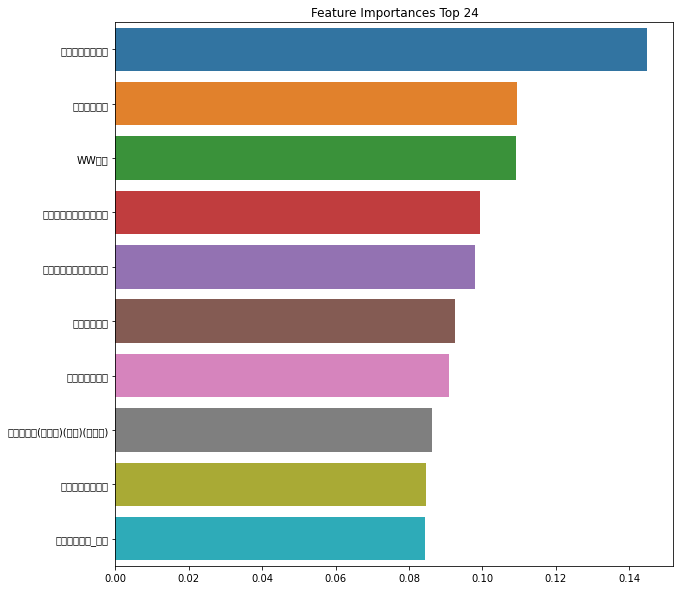

In [258]:
# feature imfortance 찍어보기

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"
model_XGB.fit(X_train, y_train)
#feature 중요도도 그려볼 수 있다. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_non_label = X_train
# del df_non_label["Delay_from_due_date"]
# df_non_label.columns

feature_importances_values = model_XGB.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=df_non_label.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:27] #중요한 순서로 정렬 후 top 24개만 뽑아 시각화

plt.figure(figsize=(10, 10))
plt.title('Feature Importances Top 24')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

## 7. 회생기업 리스트 뽑기

위에서 피쳐 선택&스케일링하고 오기

In [262]:
df_부실징후.head(3)

,회사명,거래소코드,회계년도,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
0,케이알모터스(주),000040,2013.0,1,-4.29,9379.15,603.89,7.59,-6.64,-2.77,...,57315.0,-8.591876e+10,8.405309,-6.576044e+08,0.001550,1,154.0,0.000010,666080.0,0.001283
1,성창기업지주(주),000180,2013.0,1,-1.39,28423.83,1111.80,14.62,-2.82,-0.52,...,253423.0,-4.619692e+10,8.684003,2.632381e+09,0.106379,0,28438.0,0.001337,-43268.0,0.000147
2,디엘(주),000210,2014.0,0,-3.33,494645.17,31419.37,2.11,-4.74,-2.06,...,2648892.0,8.205913e+10,-2.139125,1.844954e+09,-1.336562,1,-2124518.0,-0.010160,-122922.0,0.000605


In [298]:
# ttest_col
# selected_variables
# lasso_features
# list_kbest
# list_feature_final

# df_modeling = df_부실징후[["거래소코드","회계년도","한계기업여부"] + list_feature_final]
# print(len(df_modeling.columns)-3)

10


In [335]:
x_train_stan

,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,총자본순이익률,자기자본순이익률,경영자본순이익률,자본금순이익률,...,LEV지수,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
0,0.239475,-0.237312,-0.363394,-0.339336,0.421883,0.332877,0.278988,0.431860,0.453838,0.662705,...,-0.812908,-0.248409,0.119815,0.723505,-0.513344,0.479338,0.076363,0.163623,0.526200,0.564302
1,0.550029,-0.036135,-0.337115,0.088769,0.499815,0.551640,0.481249,0.664605,0.707267,0.636958,...,0.240051,0.148477,0.439125,0.777415,-0.087370,0.548841,0.099194,0.603378,0.002734,0.139135
2,0.342279,4.888761,1.230999,-0.673051,0.460645,0.401909,0.348766,0.435374,0.478286,-0.681660,...,0.779988,4.996458,1.470129,-1.316165,-0.189323,-0.407855,-1.638668,-3.208779,-0.056046,0.310332
3,0.176293,-0.039597,-0.233721,-0.746127,0.459829,0.320238,0.402042,0.296970,0.413885,0.464017,...,-0.602241,-0.159598,0.603058,0.096550,-0.336685,-1.193446,-1.065671,-0.503302,-0.879379,-0.689221
4,0.364767,-1.006339,1.972799,-1.571888,-0.381508,-0.199930,-0.233971,-1.463621,-0.704185,-2.567871,...,-0.796965,0.076454,1.470129,0.106168,-0.834899,-3.946739,-0.273081,-0.797374,-0.092353,-1.126400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,-2.429155,-0.360176,-0.406313,-0.801543,-0.119560,-1.027338,-0.844525,-0.213123,-1.085820,-0.960450,...,-0.812908,-0.330003,-2.683631,-0.543270,2.480407,0.602745,0.053529,0.105358,0.067298,0.222639
603,-2.429155,-0.370890,-0.390894,0.790910,-4.535150,-4.329190,-1.720516,-2.264037,-2.080455,-0.928505,...,-0.766775,-0.341042,0.155688,-0.890508,1.918168,0.512989,0.076239,0.160168,0.034664,0.083933
604,-1.324008,-0.390163,-0.384113,2.750570,-4.535150,-1.771130,-0.537598,-0.305302,-0.646940,-0.073198,...,-0.773847,-0.317902,0.440998,-0.890508,1.538001,0.536623,0.067415,0.107332,0.045702,0.093212
605,0.139883,-0.594071,-0.386730,-1.944577,-4.535150,-0.699681,-4.685591,0.709748,-3.487733,-3.526711,...,-0.812908,-0.302023,-3.611595,-0.890508,0.355081,0.762005,0.020303,-0.677489,0.023992,-0.127956


In [336]:
X_train

,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,총자본순이익률,자기자본순이익률,경영자본순이익률,자본금순이익률,...,LEV지수,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
0,0.905577,-0.173789,-0.195188,1.767937,0.526339,0.693626,0.701375,0.681572,0.795620,0.910634,...,-0.692635,0.146438,-1.757911,0.255385,-0.306792,0.110486,0.209432,0.203410,-0.290175,-0.346833
1,-1.617986,-0.074835,-0.500284,-0.311486,0.519420,0.439925,0.681263,0.656212,0.761824,0.840937,...,-0.696427,-0.255758,-2.316055,1.252427,0.084218,0.275821,0.211464,0.219721,-0.088486,0.058104
2,0.868341,-0.312552,-0.077032,0.172671,0.486919,0.639867,0.660457,0.637714,0.604734,0.808465,...,3.757011,0.177801,0.831372,0.182720,-0.004667,-0.547658,0.211382,0.208184,-0.088638,0.059903
3,0.933503,-0.018960,-0.220650,1.265394,0.618693,0.748327,1.041205,0.917870,1.087270,1.012532,...,1.830657,-0.120538,0.975551,0.255385,-0.030104,-0.114376,0.223209,0.203910,4.124814,1.248012
4,0.831951,-0.643130,-0.215774,-0.154595,0.060383,0.640811,-0.549061,-0.202159,-0.717705,-2.454353,...,0.030575,0.050440,0.124494,-0.758025,-0.147709,-0.316998,0.194813,0.145713,-0.117524,-0.401008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.842107,-0.260385,0.063378,-0.388093,0.500274,0.518204,0.620232,0.505841,0.709252,0.352509,...,-0.125030,-0.396808,0.343407,0.159573,-1.096956,0.261536,0.220882,0.243659,-0.349715,-1.231997
170,-1.617986,-0.389121,-0.382682,2.632065,0.024503,0.151328,0.215903,0.444081,0.350635,0.194500,...,-0.696427,-0.398684,-1.367468,0.255385,0.018641,0.661788,0.246947,0.590700,-0.099891,-0.158678
171,-1.617986,-0.445572,-0.355684,1.165498,-3.490920,-3.633435,-2.321033,-0.700115,-1.997585,-0.017310,...,-0.696427,-0.432194,-1.439055,-0.758025,2.799254,0.353226,0.210444,0.200777,-0.158013,-0.209379
172,-1.088224,-0.425165,-0.386686,2.632065,-2.727145,-0.709745,-0.088557,0.317876,-0.205127,0.524715,...,-0.696427,-0.358433,1.046373,-0.758025,0.939717,0.491235,0.210444,0.200777,-0.277156,-0.307338


In [211]:
x_test_predict = pd.concat([X_train, X_test], axis=0)
y_test_predict = pd.concat([y_train, y_test], axis=0)

In [212]:
predict_index = pd.concat([train_set_index,test_set_index], axis=0)
predict_index.reset_index(drop=True, inplace=True)
predict_index

,거래소코드,회계년도
0,000040,2013.0
1,000180,2013.0
2,000210,2014.0
3,000300,2012.0
4,000360,2012.0
...,...,...
776,230980,2018.0
777,238120,2017.0
778,241820,2018.0
779,246720,2018.0


In [400]:
# from sklearn.preprocessing import StandardScaler

# test_predicted = df_modeling[["거래소코드","회계년도"]] # 예측 DF
# y_train_scaling = df_modeling[["한계기업여부", "회계년도"]]
# X_train_scaling = df_modeling.drop(["거래소코드", "한계기업여부", "회계년도"],axis=1)

# # StandardScaler객체 생성
# scaler_stan = StandardScaler()
# scaler_stan.fit(X_train_scaling)
# data_scaled_stan = scaler_stan.transform(X_train_scaling)

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# x_scaled_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train_scaling.columns)
# x_scaled_stan

# y_train_scaling.reset_index(drop=True, inplace=True)
# x_scaled_stan.reset_index(drop=True, inplace=True)

# df_modeling = pd.concat([y_train_scaling,x_scaled_stan], axis=1)
# df_modeling.reset_index(drop=True, inplace=True)

In [401]:
# # train : 2012 ~ 2016
# train_set = df_modeling[((df_modeling["회계년도"]==2017)|(df_modeling["회계년도"]==2018)).map(func_not)]
# train_set.reset_index(drop=True, inplace=True)
# y_train = train_set[target]
# X_train = train_set.drop(["회계년도", target], axis=1)


# # predict set : 2012 ~ 2018
# test_set = df_modeling
# test_set.reset_index(drop=True, inplace=True)
# y_test = test_set[target]
# X_test = test_set.drop(["회계년도",target], axis=1)

In [213]:
clf = XGBClassifier(random_state=1, min_child_weight=1, gamma=2, subsample=1, colsample_bytree=1, max_depth=5, learning_rate=0.1)
clf.fit(X_train, y_train)
y_hat = clf.predict(x_test_predict)

[19:02:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [214]:
predict_index

,거래소코드,회계년도
0,000040,2013.0
1,000180,2013.0
2,000210,2014.0
3,000300,2012.0
4,000360,2012.0
...,...,...
776,230980,2018.0
777,238120,2017.0
778,241820,2018.0
779,246720,2018.0


In [215]:
predict = pd.concat([predict_index, pd.Series(y_hat)], axis=1)
predict.columns = ["거래소코드", "회계년도", "예측_한계기업여부"]

predict = pd.merge(predict, df_부실징후, on=["거래소코드","회계년도"], how="left")
predict = predict[predict["예측_한계기업여부"]==False]
predict.drop("예측_한계기업여부", axis=1, inplace=True)
predict.sort_values(by="회계년도", inplace=True)
predict.reset_index(drop=True, inplace=True)
predict.to_excel("./datasets/예상회생기업.xlsx")
predict

,거래소코드,회계년도,회사명,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
0,011080,2012.0,(주)형지아이앤씨,0,-17.89,-3474.05,565.48,49.87,-16.27,-24.32,...,14702.0,-7.414892e+10,5.164151,-1.412827e+08,0.514477,3,313190.0,0.004740,-4903.0,-0.000006
1,011070,2012.0,LG이노텍(주),0,0.71,494645.17,91001.99,10.57,-0.47,2.00,...,1268306.0,-1.901724e+11,5.164151,4.308617e+08,-1.108283,2,530808.0,0.005131,-758964.0,-0.006949
2,052770,2012.0,(주)아이톡시,0,0.27,12672.10,544.56,40.04,-6.15,0.70,...,15307.0,-3.810353e+10,8.167757,5.487039e+09,-0.037748,0,-2000.0,-0.000008,27739.0,0.000047
3,085370,2012.0,(주)루트로닉,0,0.05,15708.51,549.52,46.63,0.09,0.34,...,31554.0,-4.823972e+10,5.164151,1.209766e+09,-0.154225,1,-167765.0,-0.001080,-73003.0,-0.001604
4,084990,2012.0,(주)헬릭스미스,0,-11.97,-2077.89,-90.41,58.33,-119.15,-2.26,...,64452.0,-8.647400e+09,10.034438,5.435934e+09,0.049938,0,322287.0,0.005849,42920.0,0.000596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,019540,2018.0,(주)일지테크,1,0.27,81642.62,5301.11,7.46,-1.51,0.51,...,122842.0,-1.692489e+11,2.340424,-1.310231e+10,-3.729604,2,-24969.0,-0.000262,73042.0,0.000851
113,012860,2018.0,(주)모베이스전자,1,0.15,153060.01,10685.77,7.67,-2.35,0.29,...,130167.0,-7.643583e+10,2.340424,1.532949e+09,-4.893139,1,-8508.0,-0.000089,40212.0,0.000394
114,007860,2018.0,(주)서연,0,0.20,494645.17,30641.42,9.24,-1.51,0.43,...,950271.0,-1.827342e+11,17.240175,2.417217e+07,-5.920652,1,-143067.0,-0.001108,-64085.0,-0.000224
115,053280,2018.0,예스이십사(주),0,-2.73,24423.57,-96.89,19.60,-1.07,-0.53,...,67805.0,-4.660944e+11,6.843554,-5.735181e+09,-0.405160,2,219956.0,0.001495,-3396.0,0.000080


In [221]:
print(len(predict[predict["한계기업여부"]==0]))
print(len(predict[predict["한계기업여부"]==1]))

112
5


In [217]:
# 예측실패한 3개 기업
predict[predict["한계기업여부"]==1]

,거래소코드,회계년도,회사명,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
100,037400,2017.0,우리엔터프라이즈(주),1,-0.40,130414.30,8485.20,5.09,-1.56,-0.36,...,195454.0,-9.475488e+10,-0.869557,-3.890609e+09,-2.078373,3,-24933.0,-9.390080e-05,161996.0,0.000997
103,082850,2017.0,우리바이오(주),1,-0.48,124438.63,7956.96,4.67,-1.58,-0.47,...,161916.0,-9.780441e+10,7.191381,-4.066973e+09,-1.022301,3,-17.0,-3.326341e-07,-86882.0,-0.000551
105,122690,2018.0,(주)서진오토모티브,1,-0.83,158424.24,13521.72,3.65,-1.96,-1.29,...,167870.0,-5.425769e+10,2.340424,-2.823967e+09,-6.674097,1,784.0,5.249165e-06,-36755.0,-0.000462
112,019540,2018.0,(주)일지테크,1,0.27,81642.62,5301.11,7.46,-1.51,0.51,...,122842.0,-1.692489e+11,2.340424,-1.310231e+10,-3.729604,2,-24969.0,-2.617138e-04,73042.0,0.000851
113,012860,2018.0,(주)모베이스전자,1,0.15,153060.01,10685.77,7.67,-2.35,0.29,...,130167.0,-7.643583e+10,2.340424,1.532949e+09,-4.893139,1,-8508.0,-8.887856e-05,40212.0,0.000394


In [222]:
sum = 0
for i in list(predict["회계년도"].unique()):
    print(i, " : ", len(predict[predict["회계년도"]==i]))
    sum += len(predict[predict["회계년도"]==i])
sum    

2012.0  :  33
2013.0  :  16
2014.0  :  20
2015.0  :  14
2016.0  :  17
2017.0  :  4
2018.0  :  13


117

In [100]:
predict[predict["회계년도"]==2017]

,거래소코드,회계년도,회사명,한계기업여부,이자보상배율(이자비용),부가가치(백만원),금융비용(백만원),매출액총이익률,매출액순이익률,총자본사업이익률,...,순자산가치(백만원),KZ지수,산업매출성장률,WW지수,NCAV지수,기업생명주기,순매수거래량_기관,순매수거래대금 비중_기관,순매수거래량_외국인,순매수거래대금 비중_외국인
128,072130,2017.0,유엔젤(주),0,-5.78,11454.62,-127.08,42.98,-20.75,-1.25,...,39811.0,-2.225524e+11,11.063787,3.615623e+09,0.357261,4,-48263.0,-0.000606,8306.0,0.000008
129,098120,2017.0,(주)마이크로컨텍솔루션,1,-29.21,4036.20,-196.19,8.21,-14.28,-3.66,...,36931.0,-1.196796e+11,7.191381,-3.389367e+09,0.465123,2,-338021.0,-0.004269,-141353.0,-0.003169
130,072870,2017.0,메가스터디(주),0,-29.21,44611.24,-1451.12,46.71,-2.67,-2.88,...,271541.0,-5.501028e+11,11.063787,-2.575886e+09,0.518757,3,-63985.0,-0.002203,48273.0,0.002437
131,037400,2017.0,우리엔터프라이즈(주),1,-0.40,130414.30,8485.20,5.09,-1.56,-0.36,...,195454.0,-9.475488e+10,-0.869557,-3.890609e+09,-2.078373,3,-24933.0,-0.000094,161996.0,0.000997
132,200710,2017.0,(주)에이디테크놀로지,0,-1.02,6666.92,-78.09,11.24,0.53,0.14,...,38582.0,-2.526906e+11,7.191381,-5.386218e+09,0.277998,1,-850956.0,-0.017676,94263.0,0.001559
133,010640,2017.0,진양폴리우레탄(주),0,-7.26,4340.94,104.79,7.56,2.27,-2.19,...,18197.0,-7.095856e+09,7.191381,4.741462e+08,-0.643171,0,3942.0,0.000020,5503.0,0.000089


In [218]:
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, roc_auc_score, confusion_matrix

# confusion matrix 만드는 함수
def score(y_test, pred):
    # score print
    print('accuracy score : {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('precision score : {0:.3f}'.format(precision_score(y_test, pred)))
    print('recall score : {0:.3f}'.format(recall_score(y_test, pred)))
    print('f1 score : {0:.3f}'.format(f1_score(y_test, pred)))
    print('roc score : {0:.3f}'.format(roc_auc_score(y_test, pred)))
    # confusion matirx 함수
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='Blues', fmt='g')
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('Actual', fontsize=20)

accuracy score : 0.857
precision score : 0.839
recall score : 0.991
f1 score : 0.909
roc score : 0.751


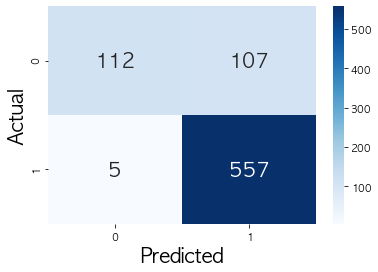

In [219]:
score(y_test_predict, y_hat)